## Machine Learning  Algorithms to Drive CRM  in the online E-Commerce site

In [2]:
# Disbaling 'jedi' to resolve the issue of auto completion
%config Completer.use_jedi = False

**Import the required packages**

In [3]:
import pandas as pd
import numpy as np
import warnings
import itertools
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle

from sklearn.tree import  DecisionTreeClassifier
from sklearn import svm, naive_bayes, discriminant_analysis, tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, Ridge
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import f1_score, recall_score, auc, roc_curve, roc_auc_score, precision_score, precision_recall_curve

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings('ignore')

### Load the Dataset

In [4]:
filePath_train = "D:\Study\Data Science\IIMB_BDA Course\Assignment 4\DATA SET\IMB 621 VMW SERVER CASE TRAINING DATA 28 MAY 2017.csv"
filePath_test  = "D:\Study\Data Science\IIMB_BDA Course\Assignment 4\DATA SET\IMB 621 VMW SERVER CASE VALIDATION DATA 28 MAY 2017.csv"

In [5]:
df_initial = pd.read_csv(filePath_train)
#test_initial = pd.read_csv(filePath_test)
df_initial.head()

,ID,flag,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,...,days_till_prodO_first_upcoming_contract_end_date,days_till_prodO_last_upcoming_contract_end_date,days_till_prodS_first_upcoming_contract_end_date,days_till_prodS_last_upcoming_contract_end_date,days_till_prodM_first_upcoming_contract_end_date,days_till_prodM_last_upcoming_contract_end_date,days_till_prodB_and_prodH_first_upcoming_contract_end_,days_till_prodB_and_prodH_last_upcoming_contract_end_d,days_till_prodY_first_upcoming_contract_end_date,days_till_prodY_last_upcoming_contract_end_date
0,631784,t,3,0,0,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302014,t,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1019521,t,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17011,t,2,0,0,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211815,t,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_initial.shape

(100000, 956)

In [7]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 956 entries, ID to days_till_prodY_last_upcoming_contract_end_date
dtypes: float64(589), int64(267), object(100)
memory usage: 729.4+ MB


In [8]:
df_initial.dtypes.value_counts()

float64    589
int64      267
object     100
dtype: int64

**Variable names of dataset**

In [9]:
colName_df = pd.DataFrame({'Column_Name':df_initial.columns, 'Data_Type':df_initial.dtypes})
colName_df.reset_index(drop=True, inplace=True)
colName_df

,Column_Name,Data_Type
0,ID,int64
1,flag,object
2,tot_page_views,int64
3,tot_page_views_l30d,int64
4,tot_page_views_l90d,int64
5,tot_visits,int64
6,tot_visits_l30d,int64
7,tot_visits_l90d,int64
8,log_in_events,int64
9,internal_search_events,int64


**Identify the columns with date**

In [10]:
date_cols_lst = [col for col in df_initial.columns if 'date' in col]  # list comprehension
date_cols_lst

['prodA_launch_date',
 'prodA_5_x_launch_date',
 'prodB_launch_date',
 'vsa_launch_date',
 'prodD_launch_date',
 'prodE_launch_date',
 'prodF_launch_date',
 'prodG_launch_date',
 'prodH_launch_date',
 'prodJ_launch_date',
 'prodI_launch_date',
 'prodK_launch_date',
 'draas_launch_date',
 'prodL_launch_date',
 'prodM_launch_date',
 'first_any_product_purch_date',
 'first_prodA_purchase_date',
 'first_prodA_5_x_purchase_date',
 'first_prodB_purchase_date',
 'first_prodC_purchase_date',
 'first_prodD_purchase_date',
 'first_prodE_purchase_date',
 'first_prodF_purchase_date',
 'first_prodG_purchase_date',
 'first_prodH_purchase_date',
 'first_prodJ_purchase_date',
 'first_prodI_purchase_date',
 'first_prodK_purchase_date',
 'first_draas_purchase_date',
 'first_prodL_purchase_date',
 'first_prodM_purchase_date',
 'first_prodN_purchase_date',
 'first_prodO_purchase_date',
 'first_prodX_purchase_date',
 'first_prodP_purchase_date',
 'first_prodQ_purchase_date',
 'first_prodS_purchase_date',
 

**Capture the columns except the actual date format.....**

In [11]:
temp1 = [col for col in date_cols_lst if 'days_since' in col]
temp2 = [col for col in date_cols_lst if 'days_till' in col]
#____________________________
for col in temp1:
    date_cols_lst.remove(col)

for col in temp2:
    date_cols_lst.remove(col)
#____________________________
print('Number of columns with date as an entry:', len(date_cols_lst))
date_cols_lst

Number of columns with date as an entry: 97


['prodA_launch_date',
 'prodA_5_x_launch_date',
 'prodB_launch_date',
 'vsa_launch_date',
 'prodD_launch_date',
 'prodE_launch_date',
 'prodF_launch_date',
 'prodG_launch_date',
 'prodH_launch_date',
 'prodJ_launch_date',
 'prodI_launch_date',
 'prodK_launch_date',
 'draas_launch_date',
 'prodL_launch_date',
 'prodM_launch_date',
 'first_any_product_purch_date',
 'first_prodA_purchase_date',
 'first_prodA_5_x_purchase_date',
 'first_prodB_purchase_date',
 'first_prodC_purchase_date',
 'first_prodD_purchase_date',
 'first_prodE_purchase_date',
 'first_prodF_purchase_date',
 'first_prodG_purchase_date',
 'first_prodH_purchase_date',
 'first_prodJ_purchase_date',
 'first_prodI_purchase_date',
 'first_prodK_purchase_date',
 'first_draas_purchase_date',
 'first_prodL_purchase_date',
 'first_prodM_purchase_date',
 'first_prodN_purchase_date',
 'first_prodO_purchase_date',
 'first_prodX_purchase_date',
 'first_prodP_purchase_date',
 'first_prodQ_purchase_date',
 'first_prodS_purchase_date',
 

### Data type conversion

**a.** Convert the date time values to `datetime` format

In [12]:
df_initial['load_timestamp'] = df_initial['load_timestamp'].apply(pd.to_datetime, format = '%m/%d/%Y %H:%M', errors = 'coerce')
df_initial[date_cols_lst] = df_initial[date_cols_lst].apply(pd.to_datetime, format = '%m/%d/%Y', errors = 'coerce')
df_initial.dtypes.value_counts()

float64           557
int64             267
datetime64[ns]     98
object             34
dtype: int64

**b.** Convert the data type of **prodV_booking_pct** from `object` to `float64` 

In [13]:
df_initial['prodV_booking_pct'].dtype
df_initial['prodV_booking_pct'] = pd.to_numeric(df_initial['prodV_booking_pct'], errors = "coerce")
df_initial['prodV_booking_pct'].dtype

dtype('float64')

**c.** Convert the data type of **highest_prodA_edition** from `int64` to `object`

In [14]:
df_initial['highest_prodA_edition'].dtype
df_initial['highest_prodA_edition'] = df_initial['highest_prodA_edition'].astype('object')
df_initial['highest_prodA_edition'].dtype

dtype('O')

**d.** Convert the data type of **ID** from `int64` to `object`

In [15]:
df_initial['ID'].dtype

dtype('int64')

In [16]:
df_initial['ID'] = df_initial['ID'].astype('object')
df_initial['ID'].dtype

dtype('O')

**e.** Convert the variables from `float64` to `object`

In [17]:
str_active_cust_lst = [col for col in df_initial.columns.values if 'active_cust' in col]
str_active_cust_lst

['active_cust',
 'active_cust_soflic_purchase',
 'active_cust_nwf_purchase',
 'active_cust_maintenance']

In [18]:
df_initial[str_active_cust_lst].dtypes

active_cust                    float64
active_cust_soflic_purchase    float64
active_cust_nwf_purchase       float64
active_cust_maintenance        float64
dtype: object

In [19]:
df_initial[str_active_cust_lst] = df_initial[str_active_cust_lst].astype('object')
df_initial[str_active_cust_lst].dtypes

active_cust                    object
active_cust_soflic_purchase    object
active_cust_nwf_purchase       object
active_cust_maintenance        object
dtype: object

**f.** Convert the data type of `dummy` variables from `int64` to `object`

In [20]:
lst = []
lst.append([col for col in df_initial.columns.values if 'db_industry' in col])
lst.append([col for col in df_initial.columns.values if 'geo_dunssite' in col])
lst.append([col for col in df_initial.columns.values if 'gu_emp_segment_desc' in col])
lst.append([col for col in df_initial.columns.values if 'idc_verticals' in col])
lst.append([col for col in df_initial.columns.values if 'citdb_ent_server' in col])
lst.append([col for col in df_initial.columns.values if 'citdb_ent_it_budget' in col])
lst.append([col for col in df_initial.columns.values if 'record_type' in col])
lst.append([col for col in df_initial.columns.values if 'highest_prodA_edition' in col])
lst.append([col for col in df_initial.columns.values if 'flag' in col])

flat_list = [item for sublist in lst for item in sublist]   # flat list from list of list
#------------------------------------------------------------------------------
to_remove = ['db_industry', 'geo_dunssite', 'gu_emp_segment_desc', 'idc_verticals', 'citdb_ent_server',
             'citdb_ent_it_budget', 'record_type', 'highest_prodA_edition']

for x in to_remove:
    flat_list.remove(x)
#------------------------------------------------------------------------------
print('Number of dummy variables already exist in the dataset',len(flat_list))  

Number of dummy variables already exist in the dataset 133


In [21]:
df_initial[flat_list] = df_initial[flat_list].astype('object')
df_initial[flat_list].dtypes.value_counts()

object    133
dtype: int64

### Handling the Missing values

Function to identify null values in the dataset

In [22]:
def missing_values_table_fn(df):
        mis_val = df.isnull().sum()                           # Total missing values
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)   # Percentage of missing values
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
mis_val_table = missing_values_table_fn(df_initial)
mis_val_table

Your selected dataframe has 956 columns.
There are 531 columns that have missing values.


,Missing Values,% of Total Values
first_prodU_purchase_date,100000,100.0
prodJ_first_upcoming_contract_end_date,100000,100.0
days_bw_prodS_launch_and_purch,100000,100.0
prodX_last_upcoming_contract_end_date,100000,100.0
prodX_first_upcoming_contract_end_date,100000,100.0
prodW_last_upcoming_contract_end_date,100000,100.0
prodW_first_upcoming_contract_end_date,100000,100.0
days_since_last_prodU_purchase_date,100000,100.0
days_bw_prodX_launch_and_purch,100000,100.0
last_prodP_purchase_date,100000,100.0


**Visualization:`Missing value columns`**

In [24]:
miss_value = mis_val_table.iloc[:,1].values

Text(0.5, 1.0, 'Fraction of Missing Values Histogram')

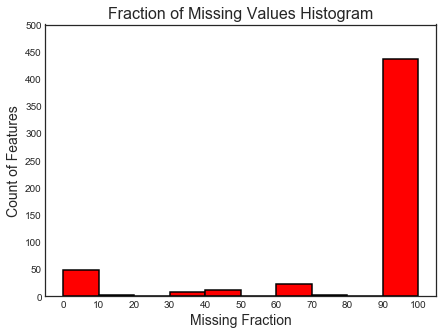

In [25]:
plt.style.use('seaborn-white')
plt.figure(figsize = (7, 5))
plt.hist(miss_value, bins = np.linspace(0, 100, 11), edgecolor = 'k', color = 'red', linewidth = 1.5)

plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(0, 500, 11))
plt.xlabel('Missing Fraction', size = 14) 
plt.ylabel('Count of Features', size = 14) 
plt.title("Fraction of Missing Values Histogram", size = 16)

**Removing the Columns with `NAN` value above certain threshold**

In [26]:
mis_threshold = 90.0
mis_cols_lst = []
for i in range(len(mis_val_table)):
    if (mis_val_table['% of Total Values'].values[i]) >= mis_threshold:
        mis_cols_lst.append(mis_val_table.index[i])

print('Number of columns with the missing values more than the threshold({}%):{}'.format(mis_threshold, len(mis_cols_lst)))
mis_cols_lst

Number of columns with the missing values more than the threshold(90.0%):436


['first_prodU_purchase_date',
 'prodJ_first_upcoming_contract_end_date',
 'days_bw_prodS_launch_and_purch',
 'prodX_last_upcoming_contract_end_date',
 'prodX_first_upcoming_contract_end_date',
 'prodW_last_upcoming_contract_end_date',
 'prodW_first_upcoming_contract_end_date',
 'days_since_last_prodU_purchase_date',
 'days_bw_prodX_launch_and_purch',
 'last_prodP_purchase_date',
 'last_prodS_purchase_date',
 'days_since_first_prodU_purchase_date',
 'days_bw_prodP_launch_and_purch',
 'last_prodU_purchase_date',
 'gu_ind_vmw_major_lookup',
 'gu_ind_vmw_sub_category',
 'first_prodP_purchase_date',
 'first_prodX_purchase_date',
 'days_since_last_prodS_purchase_date',
 'days_since_first_prodS_purchase_date',
 'days_since_last_prodP_purchase_date',
 'days_since_first_prodP_purchase_date',
 'days_since_last_prodX_purchase_date',
 'days_since_first_prodX_purchase_date',
 'first_draas_purchase_date',
 'days_bw_prodU_launch_and_purch',
 'days_since_first_draas_purchase_date',
 'prodF_last_upcomi

**Dataframe without missing value columns (<90% NaN)**

In [27]:
df_cleaned = df_initial.drop(mis_cols_lst, axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 520 entries, ID to ftr_growth_prodA_ent_plus_14_15
dtypes: datetime64[ns](20), float64(199), int64(137), object(164)
memory usage: 396.7+ MB


In [28]:
df_cleaned.dtypes.value_counts()

float64           199
object            164
int64             137
datetime64[ns]     20
dtype: int64

### Collect numerical and categorical variable information seperately

**1. Dataframe of numerical variable**

In [34]:
def get_NumericalVar(df):
    num_df = pd.DataFrame(df.select_dtypes(['int64', 'float64']).nunique())
    num_df.reset_index(drop=False, inplace=True)
    num_df = num_df.rename(columns={'index':'NumVarName', 0:'UniqueCounts'}, inplace=False)
    # num_df.sort_values(by='UniqueCounts', ascending=False)

    return num_df

In [35]:
numVar_df = get_NumericalVar(df_cleaned)
numVar_df

,NumVarName,UniqueCounts
0,tot_page_views,847
1,tot_page_views_l30d,228
2,tot_page_views_l90d,431
3,tot_visits,270
4,tot_visits_l30d,63
5,tot_visits_l90d,131
6,log_in_events,1
7,internal_search_events,18
8,internal_campaign_events,1
9,find_retailer_events,1


In [37]:
lst_numVar_final = numVar_df['NumVarName'].values.tolist()
len(lst_numVar_final)

336

**2. Numerical variables with lower variation**

In [38]:
temp3 = numVar_df[numVar_df.UniqueCounts <=1].index.tolist()
LessVariCol_lst= numVar_df.iloc[temp3]['NumVarName'].values.tolist()
len(LessVariCol_lst)

56

In [39]:
LessVariCol_lst

['log_in_events',
 'internal_campaign_events',
 'find_retailer_events',
 'contact_support_events',
 'find_a_partner_events',
 'form_success_events',
 'form_abandon_events',
 'cart_open_events',
 'cart_add_events',
 'cart_remove_events',
 'cart_view_events',
 'checkout_s1_events',
 'survey_display_events',
 'survey_submit_events',
 'tot_bing_se_visits',
 'tot_altavista_se_visits',
 'tot_aol_se_visits',
 'tot_excite_se_visits',
 'tot_lycos_se_visits',
 'tot_store_vmw_prod_reg_page_views',
 'tot_store_prodD_accelaration_kit_product_page_views',
 'tot_store_vcenter_site_recovery_manager_page_views',
 'tot_store_prodU_green_prodJ_suite_page_views',
 'tot_store_prodU_green_prodJ_suite_cloud_page_views',
 'tot_store_prodU_orange_prodJ_suite_page_views',
 'tot_store_prodU_orange_prodJ_suite_cloud_page_views',
 'tot_store_prodU_blue_prodJ_suite_page_views',
 'tot_store_prodU_blue_prodJ_suite_cloud_page_views',
 'tot_store_prodU_content_locker_collaborate_page_views',
 'tot_store_upgrade_to_prod

Remove the variables with `lower variance` from the final list of numerical variables

In [40]:
for col in LessVariCol_lst:
    lst_numVar_final.remove(col)

Missing values in these remaining numerical variables

In [41]:
missing_values_table_fn(df_cleaned[lst_numVar_final])

Your selected dataframe has 280 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
db_annualsales,79588,79.6
gu_annual_sales_usd,61864,61.9
total_employees,61851,61.9
gu_num_of_employees,61785,61.8
sum_num_of_employees,61677,61.7
derived_total_employees,61677,61.7
idm_no_of_day_visits_to_support_page,41357,41.4
idm_no_of_day_visits_to_info_page,41357,41.4
idm_no_of_day_visits_to_eval_page,41357,41.4
idm_no_of_day_visits_to_download_page,41357,41.4


**Filling the NA data with zero - idm_*_pagevisits-**  
Can be filled with zero as these variables are page visits data and NA & zero can be deduced as same i.e. no visit to the page.

In [42]:
# columns with string 'idm_' in them
str_idm_lst = [col for col in lst_numVar_final if 'idm_' in col]
print('Number of columns with "idm_" string:', len(str_idm_lst))

#---------------------------------------------------------------
# filling missing value
df_cleaned[str_idm_lst] = df_cleaned[str_idm_lst].fillna(value=0, inplace=False)

Number of columns with "idm_" string: 10


In [44]:
MissingNumVar_lst = missing_values_table_fn(df_cleaned[lst_numVar_final]).index.values.tolist()

Your selected dataframe has 280 columns.
There are 56 columns that have missing values.


In [45]:
str_views_lst = [col for col in MissingNumVar_lst if '_views' in col]
len(str_views_lst)

16

In [46]:
str_views_lst

['tot_last_touch_paid_search_views',
 'tot_first_touch_cid_codes_views',
 'tot_first_touch_src_codes_views',
 'tot_first_touch_direct_views',
 'tot_first_touch_internal_views',
 'tot_first_touch_social_network_views',
 'tot_first_touch_referring_domain_views',
 'tot_last_touch_natural_search_views',
 'tot_last_touch_cid_codes_views',
 'tot_last_touch_src_codes_views',
 'tot_last_touch_direct_views',
 'tot_last_touch_internal_views',
 'tot_last_touch_social_network_views',
 'tot_last_touch_referring_domain_views',
 'tot_first_touch_natural_search_views',
 'tot_first_touch_paid_search_views']

**Missing values filled with 'median'of the data**

In [47]:
df_cleaned[str_views_lst] = df_cleaned[str_views_lst].fillna(value=df_cleaned[str_views_lst].median(), inplace=False)

- `total_amount` is the sum of the products booking amount till date
- `total_bookings_amount` is equal to 'channel_total'
- `pct` value = total_prodxyz_booking_amount/ total_amount
- `pct` values are `NA` if `0/0` condition occurred
- `vsan_booking_pct` & `vsan_license_booking_pct` can be removed as it has only one non zero value
- `vcs_booking_pct` can be removed as it has only one non zero value
- `vsa_booking_pct` can be removed as it's value is same as `prodB_booking_pct`
- all the other `_pct` values can be filled by ZERO

In [49]:
temp4=missing_values_table_fn(df_cleaned[lst_numVar_final])
misspct_lst = [col for col in temp4.index.tolist() if '_pct' in col]

Your selected dataframe has 280 columns.
There are 40 columns that have missing values.


In [50]:
misspct_lst

['channel_partner_total_pct',
 'channel_support_total_pct',
 'channel_web_total_pct',
 'channel_direct_total_pct',
 'channel_oem_total_pct',
 'prodA_5x_booking_pct',
 'prodE_booking_pct',
 'prodA_ent_plus_booking_pct',
 'prodA_ent_booking_pct',
 'vsan_license_booking_pct',
 'prodN_license_booking_pct',
 'prodN_booking_pct',
 'prodJ_booking_pct',
 'prodG_booking_pct',
 'prodB_booking_pct',
 'prodV_booking_pct',
 'vsan_booking_pct',
 'prodM_booking_pct',
 'vcs_booking_pct',
 'prodH_booking_pct',
 'prodF_booking_pct',
 'prodD_booking_pct',
 'vsa_booking_pct',
 'prodA_booking_pct',
 'total_prodL_booking_pct',
 'prodA_std_booking_pct']

As mentioned above, missing pct variabes can be filled with the zero values as NA values intent is to show `no purchase` by that customer,  in this product range.

In [51]:
df_cleaned[misspct_lst] = df_cleaned[misspct_lst].fillna(value=0)

In [52]:
missing_values_table_fn(df_cleaned[lst_numVar_final])

Your selected dataframe has 280 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
db_annualsales,79588,79.6
gu_annual_sales_usd,61864,61.9
total_employees,61851,61.9
gu_num_of_employees,61785,61.8
sum_num_of_employees,61677,61.7
derived_total_employees,61677,61.7
num_cpu,38293,38.3
avg_cpu_cores,38293,38.3
avg_cpu_threads,38293,38.3
num_hosts,38292,38.3


- Removing `db_annualsales` columns is number of NaN > 75%
- Removing `total_employees`, `sum_num_of_employees` and `derived_total_employees` as there values are misleading
- Removing `num_cpu`, `avg_cpu_cores`, `avg_cpu_threads` , `num_hosts` and `vmkernel_memory_in_gb` as 38% data is NaN and 60% data is some garbage value

In [53]:
drop_lst = ['db_annualsales', 'total_employees', 'sum_num_of_employees', 'derived_total_employees', 'num_cpu',
               'avg_cpu_cores', 'avg_cpu_threads' , 'num_hosts', 'vmkernel_memory_in_gb']

#--------------------------------------------------------------------------------------
# Update the final list of numerical variables
for col in drop_lst:
    lst_numVar_final.remove(col)

In [54]:
lst_numVar_final

['tot_page_views',
 'tot_page_views_l30d',
 'tot_page_views_l90d',
 'tot_visits',
 'tot_visits_l30d',
 'tot_visits_l90d',
 'internal_search_events',
 'buy_now_events',
 'download_trial_events',
 'support_search_events',
 'get_pricing_events',
 'product_view_events',
 'campaign_view_events',
 'purchase_events',
 'paid_search_events',
 'natural_search_events',
 'tot_campaign_visits',
 'tot_paid_search_visits',
 'tot_google_browser_visits',
 'tot_mozilla_browser_visits',
 'tot_microsoft_browser_visits',
 'tot_apple_browser_visits',
 'tot_opera_browser_visits',
 'tot_other_browser_visits',
 'tot_internal_ref_visits',
 'tot_search_engine_ref_visits',
 'tot_email_ref_visits',
 'tot_social_media_ref_visits',
 'tot_other_ref_visits',
 'tot_prodQ_os_visits',
 'tot_android_visits',
 'tot_ios_visits',
 'tot_winphone_visits',
 'tot_blackberry_visits',
 'tot_windows_visits',
 'tot_linux_visits',
 'tot_osx_visits',
 'tot_google_se_visits',
 'tot_yahoo_se_visits',
 'tot_baidu_se_visits',
 'tot_msn_se

In [57]:
missing_values_table_fn(df_cleaned[lst_numVar_final])

Your selected dataframe has 271 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
gu_annual_sales_usd,61864,61.9
gu_num_of_employees,61785,61.8
days_bw_prodG_launch_and_purch,5260,5.3
days_since_first_prodG_purchase_date,5260,5.3
days_since_last_prodG_purchase_date,5260,5.3


 - **Fill `gu_annual_sales_usd` and `gu_num_of_employees` with median value**
 - **Fill `days_bw_prodG_launch_and_purch`, `days_since_last_prodG_purchase_date` and `days_since_first_prodG_purchase_date` with median value**

In [58]:
df_cleaned['gu_annual_sales_usd'] = df_cleaned['gu_annual_sales_usd'].fillna(df_cleaned['gu_annual_sales_usd'].median())
df_cleaned['gu_num_of_employees'] = df_cleaned['gu_num_of_employees'].fillna(df_cleaned['gu_num_of_employees'].median())

#---------------------------------------------------------------
df_cleaned['days_bw_prodG_launch_and_purch']       = df_cleaned['days_bw_prodG_launch_and_purch'].fillna(df_cleaned['days_bw_prodG_launch_and_purch'].median())
df_cleaned['days_since_first_prodG_purchase_date'] = df_cleaned['days_since_first_prodG_purchase_date'].fillna(df_cleaned['days_since_first_prodG_purchase_date'].median())
df_cleaned['days_since_last_prodG_purchase_date']  = df_cleaned['days_since_last_prodG_purchase_date'].fillna(df_cleaned['days_since_last_prodG_purchase_date'].median())

In [59]:
missing_values_table_fn(df_cleaned[lst_numVar_final])

Your selected dataframe has 271 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Remove the rows that contain the `inf` values**

In [60]:
df_cleaned['prodA_std_booking_pct'].unique()

array([0.        , 0.31324548, 0.2200006 , 0.31600544, 0.23062891,
       0.14321214, 0.39251732, 0.27986544, 0.39235016, 0.37746586,
       0.10129465, 0.21377437, 0.21289889, 0.2071195 , 0.35320595,
       0.23230024, 0.26156677, 0.12918915, 0.0919816 , 0.25559296,
       0.21597194, 0.2570838 , 0.21917217, 0.16594623, 0.15755463,
       0.21506074, 0.33163793, 0.09324884, 0.25062972, 0.26155468,
       0.39135326, 0.1795005 , 0.3563594 , 0.03491648, 0.2579003 ,
       0.38953921, 0.34808466, 0.13343257, 0.25164391, 0.39632908,
       0.27747025, 0.04278768, 0.2718026 , 0.12145727, 0.38328345,
       0.23716338, 0.2154006 , 0.38839272, 0.26487422, 0.06559201,
       0.21759121, 0.16080162, 0.25064077, 0.15936727, 0.26925075,
       0.18647346, 0.15393243, 0.41321762, 0.21860397, 0.15366605,
       0.28476792, 0.21292577, 0.20971651, 0.23701401, 0.26048493,
       0.17801553, 0.23952932, 0.38880857, 0.18682008, 0.1260415 ,
       0.29729985, 0.23399212, 0.36321208, 0.22729453, 0.01487

In [62]:
# Id number 83453 contains the 'inf' values
inv_row_idx = df_cleaned.index[df_cleaned['prodA_std_booking_pct']== np.inf] 
inv_row_idx

Int64Index([51594], dtype='int64')

In [63]:
df_cleaned = df_cleaned.replace({'prodA_std_booking_pct' : {np.inf: 0}}, inplace = False)

In [65]:
df_cleaned.iloc[51594]['prodA_std_booking_pct']

0.0

In [67]:
df_cleaned.shape

(100000, 520)

In [68]:
df_cleaned['train_period_workstation_purchase_flag'].shape

(100000,)

**Standardizing numerical variables**

In [69]:
#standardize = lambda x:(x-x.mean())/x.std()

names = df_cleaned[lst_numVar_final].columns

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_cleaned[lst_numVar_final])  # Numerical data saved to new dataframe
df_scaled = pd.DataFrame(df_scaled, columns=names)
df_scaled.head()

,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,internal_search_events,buy_now_events,download_trial_events,support_search_events,...,ftr_growth_prodA_ent_12_13,ftr_growth_prodA_ent_plus_12_13,ftr_growth_prodA_5_x_13_14,ftr_growth_prodA_std_13_14,ftr_growth_prodA_ent_13_14,ftr_growth_prodA_ent_plus_13_14,ftr_growth_prodA_5_x_14_15,ftr_growth_prodA_std_14_15,ftr_growth_prodA_ent_14_15,ftr_growth_prodA_ent_plus_14_15
0,-0.132938,-0.10188,-0.130553,-0.102330,-0.125708,-0.146137,-0.049165,-0.051373,-0.011927,-0.011505,...,-0.003153,-0.004188,-0.005516,-0.014685,-0.004878,-0.003354,-0.012087,-0.016461,-0.004813,-0.004472
1,-0.157659,-0.10188,-0.130553,-0.170301,-0.125708,-0.146137,-0.049165,-0.051373,-0.011927,-0.011505,...,-0.003153,-0.004188,-0.005516,-0.014685,-0.004878,-0.003354,-0.012087,-0.016461,-0.004813,-0.004472
2,-0.157659,-0.10188,-0.130553,-0.170301,-0.125708,-0.146137,-0.049165,-0.051373,-0.011927,-0.011505,...,-0.003153,-0.004188,-0.005516,-0.014685,-0.004878,-0.003354,-0.012087,-0.016461,-0.004813,-0.004472
3,-0.145299,-0.10188,-0.130553,-0.102330,-0.125708,-0.146137,-0.049165,-0.051373,-0.011927,-0.011505,...,-0.003153,-0.004188,-0.005516,-0.014685,-0.004878,-0.003354,-0.012087,-0.016461,-0.004813,-0.004472
4,-0.157659,-0.10188,-0.130553,-0.170301,-0.125708,-0.146137,-0.049165,-0.051373,-0.011927,-0.011505,...,-0.003153,-0.004188,-0.005516,-0.014685,-0.004878,-0.003354,-0.012087,-0.016461,-0.004813,-0.004472


### Correlation Analysis:`Numerical Variables`

In [71]:
def fn_correlation(dataset, threshold):
    col_corr = set()                              # Set of all the names of highly correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]             # getting the name of column
                col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

    return col_corr

In [72]:
CorrCol_lst = list(fn_correlation(df_scaled[lst_numVar_final], 0.8))
type(CorrCol_lst)

list

In [73]:
print('Number of correlated variables removed:', len(CorrCol_lst))
CorrCol_lst

Number of correlated variables removed: 116


['vsan_2014_bookings_amount',
 'tot_google_se_visits',
 'prodA_ent_2013_bookings_amount',
 'channel_total',
 'ftr_growth_prodM_12_13',
 'prodH_2013_bookings_amount',
 'total_prodJ_booking_amount',
 'vsan_booking_pct',
 'ftr_growth_prodA_ent_plus_12_13',
 'prodL_2015_bookings_amount',
 'prodB_2015_bookings_amount',
 'total_prodT_booking_amount',
 'tot_page_views_l90d',
 'total_prodL_booking_amount',
 'ftr_growth_prodT_license_13_14',
 'ftr_growth_prodN_license_14_15',
 'total_prodF_booking_amount',
 'tot_search_engine_ref_visits',
 'tot_store_upgrade_to_fusion_pro_page_views',
 'prodF_2014_bookings_amount',
 'prodA_ent_2012_bookings_amount',
 'tot_visits_l90d',
 'vsan_2015_bookings_amount',
 'total_prodN_license_booking_amount',
 'total_prodM_booking_amount',
 'ftr_growth_prodA_std_13_14',
 'natural_search_events',
 'vsan_license_2014_bookings_amount',
 'channel_support_total',
 'total_prodT_license_booking_amount',
 'ftr_growth_prodA_ent_13_14',
 'total_prodA_5_x_booking_amount',
 'ftr

Remove the correlated variable list from the final numerical value list

In [74]:
for col in CorrCol_lst:
    lst_numVar_final.remove(col)

**Final figure of number of numerical variable**

In [76]:
print('Number of numerical variable after missing value and correlation analysis:',len(lst_numVar_final))
lst_numVar_final

Number of numerical variable after missing value and correlation analysis: 155


['tot_page_views',
 'tot_page_views_l30d',
 'internal_search_events',
 'buy_now_events',
 'download_trial_events',
 'support_search_events',
 'get_pricing_events',
 'product_view_events',
 'campaign_view_events',
 'purchase_events',
 'paid_search_events',
 'tot_campaign_visits',
 'tot_paid_search_visits',
 'tot_google_browser_visits',
 'tot_mozilla_browser_visits',
 'tot_microsoft_browser_visits',
 'tot_apple_browser_visits',
 'tot_opera_browser_visits',
 'tot_other_browser_visits',
 'tot_email_ref_visits',
 'tot_social_media_ref_visits',
 'tot_prodQ_os_visits',
 'tot_android_visits',
 'tot_ios_visits',
 'tot_winphone_visits',
 'tot_blackberry_visits',
 'tot_linux_visits',
 'tot_osx_visits',
 'tot_yahoo_se_visits',
 'tot_baidu_se_visits',
 'tot_msn_se_visits',
 'tot_first_touch_paid_search_views',
 'tot_first_touch_cid_codes_views',
 'tot_first_touch_src_codes_views',
 'tot_first_touch_direct_views',
 'tot_first_touch_internal_views',
 'tot_first_touch_social_network_views',
 'tot_firs

### Dealing with missing values of categorical variable

**Dataframe of categorical variables**

In [77]:
def get_categoricalVar(df):
    cat_df = pd.DataFrame(df.select_dtypes(['object']).nunique())
    cat_df.reset_index(drop=False, inplace=True)
    cat_df = cat_df.rename(columns={'index':'CatVarName', 0:'UniqueCounts'}, inplace=False)
    # cat_df.sort_values(by='UniqueCounts', ascending=False)
    
    return cat_df

In [78]:
catVar_df = get_categoricalVar(df_cleaned)
catVar_df

,CatVarName,UniqueCounts
0,ID,100000
1,flag,1
2,db_industry,33
3,db_city,12143
4,db_companyname,18352
5,db_country,175
6,db_employeerange,6
7,db_audience,122
8,db_subindustry,170
9,highest_prodA_edition,9


In [80]:
lst_catVar_final = catVar_df['CatVarName'].values.tolist()
lst_catVar_final

['ID',
 'flag',
 'db_industry',
 'db_city',
 'db_companyname',
 'db_country',
 'db_employeerange',
 'db_audience',
 'db_subindustry',
 'highest_prodA_edition',
 'flag_prodA_customer',
 'flag_prodA_5_x_customer',
 'flag_prodB_customer',
 'flag_prodC_customer',
 'flag_prodD_customer',
 'flag_prodE_customer',
 'flag_prodF_customer',
 'flag_prodG_customer',
 'flag_prodH_customer',
 'flag_prodJ_customer',
 'flag_prodO_customer',
 'flag_prodI_customer',
 'flag_prodK_avail_svcs_customer',
 'flag_prodK_prodW_svcs_customer',
 'flag_prodK_network_svcs_customer',
 'flag_prodK_customer',
 'flag_draas_customer',
 'flag_prodL_customer',
 'flag_prodN_customer',
 'flag_prodM_customer',
 'flag_prodT_customer',
 'flag_prodT_license_customer',
 'flag_prodN_license_customer',
 'flag_prodA_std_customer',
 'flag_prodA_ent_customer',
 'flag_prodA_ent_plus_customer',
 'flag_prodU_customer',
 'iso_country_dunssite',
 'region_dunssite',
 'geo_dunssite',
 'sic_2_description',
 'sic_4_description',
 'gu_city',
 '

In [81]:
missingCatVar = missing_values_table_fn(df_cleaned[lst_catVar_final])

Your selected dataframe has 164 columns.
There are 26 columns that have missing values.


Fill `NA` labels with `NotApplicable` label for the categorical variables

In [82]:
for col in missingCatVar.index.tolist():
    df_cleaned[col] = df_cleaned[col].fillna(value = 'NotApplicable')

In [83]:
missing_values_table_fn(df_cleaned[lst_catVar_final])

Your selected dataframe has 164 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [84]:
# way to search certain value in all the column
# df_cleaned.apply(lambda x: 'inf' in x.values, axis=1).any()

### Join the two data frames (Numerical + Categorical)

In [85]:
df_scaled = pd.concat([df_scaled[lst_numVar_final].reset_index(drop=True), 
                       df_cleaned[lst_catVar_final].reset_index(drop=True)], axis=1)
df_scaled.head()

,tot_page_views,tot_page_views_l30d,internal_search_events,buy_now_events,download_trial_events,support_search_events,get_pricing_events,product_view_events,campaign_view_events,purchase_events,...,ftr_dummy_citdb_ent_server7,ftr_dummy_citdb_ent_serverUnknown,ftr_dummy_geo_dunssiteAMER,ftr_dummy_geo_dunssiteAPAC,ftr_dummy_geo_dunssiteAPACtoOTHER,ftr_dummy_geo_dunssiteEMEA,ftr_dummy_geo_dunssiteUnknown,ftr_dummy_record_typeORGANIZATION,ftr_dummy_record_typePERSON,ftr_dummy_record_typeUnknown
0,-0.132938,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
1,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,-0.572750,...,0,1,0,0,0,0,1,0,0,1
2,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
3,-0.145299,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0
4,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0


In [86]:
df_scaled.dtypes.value_counts()

object     164
float64    155
dtype: int64

### Reduce the number of labels of categorical variables

**Function to reduce labels of categorical variable**

In [87]:
def fn_create_labels(df, ColumnName,LabelToAssign, Threshold):
    #NewColName = ColumnName + '_' + '1'            # Name of the new column
    ColToAdd = []                                  # list to collect the labels
        
    temp_value_count  = pd.DataFrame(df[ColumnName].value_counts())
    temp_lst = temp_value_count[temp_value_count[ColumnName] <= Threshold].index.tolist()  # list with value count < threhold
    
    # loop to assign the desired label
    for i in range(df.shape[0]):
        if df[ColumnName].values[i] in temp_lst:
            ColToAdd.append(LabelToAssign) 
        else:
            ColToAdd.append(df[ColumnName].values[i])
    
    df[ColumnName] = ColToAdd             # New column added to the dataframe
    print("Number of entries to be labelled:{}/{}".format(len(temp_lst), temp_value_count.shape[0]))
    print("Total entries to Label encode/One hot encode is {} for column {}.".format((temp_value_count.shape[0] - 
                                                                                   len(temp_lst)), ColumnName))
    
    return

**Threshold values to decrease the labels of categorial variable**

In [88]:
thres_db_audience  = 10

thres_db_city      = 20
thres_gu_city      = 20

thres_db_country   = 10
thres_iso_country  = 10
thres_gu_country   = 10

thres_gu_state     = 10

thres_db_companyname  = 10
thres_db_subindustry  = 10

Function call to reduce the labels of categorical variable

In [89]:
fn_create_labels(df_scaled, 'db_audience', 'Others', thres_db_audience)
print('_'*50)

fn_create_labels(df_scaled, 'db_city', 'Others', thres_db_city)
print('_'*50)

fn_create_labels(df_scaled, 'db_country', 'Others', thres_db_country)
print('_'*50)

fn_create_labels(df_scaled, 'db_companyname', 'Others', thres_db_companyname)
print('_'*50)

fn_create_labels(df_scaled, 'db_subindustry', 'Others', thres_db_subindustry)
print('_'*50)

fn_create_labels(df_scaled, 'gu_city', 'Others', thres_gu_city)
print('_'*50)

fn_create_labels(df_scaled, 'iso_country_dunssite', 'Others', thres_iso_country)
print('_'*50)

fn_create_labels(df_scaled, 'gu_iso_country_name', 'Others', thres_gu_country)
print('_'*50)

fn_create_labels(df_scaled, 'gu_state', 'Others', thres_gu_state)
print('_'*50)
df_scaled.head()

Number of entries to be labelled:20/123
Total entries to Label encode/One hot encode is 103 for column db_audience.
__________________________________________________
Number of entries to be labelled:11594/12144
Total entries to Label encode/One hot encode is 550 for column db_city.
__________________________________________________
Number of entries to be labelled:92/176
Total entries to Label encode/One hot encode is 84 for column db_country.
__________________________________________________
Number of entries to be labelled:17892/18353
Total entries to Label encode/One hot encode is 461 for column db_companyname.
__________________________________________________
Number of entries to be labelled:36/171
Total entries to Label encode/One hot encode is 135 for column db_subindustry.
__________________________________________________
Number of entries to be labelled:10609/10849
Total entries to Label encode/One hot encode is 240 for column gu_city.
______________________________________

,tot_page_views,tot_page_views_l30d,internal_search_events,buy_now_events,download_trial_events,support_search_events,get_pricing_events,product_view_events,campaign_view_events,purchase_events,...,ftr_dummy_citdb_ent_server7,ftr_dummy_citdb_ent_serverUnknown,ftr_dummy_geo_dunssiteAMER,ftr_dummy_geo_dunssiteAPAC,ftr_dummy_geo_dunssiteAPACtoOTHER,ftr_dummy_geo_dunssiteEMEA,ftr_dummy_geo_dunssiteUnknown,ftr_dummy_record_typeORGANIZATION,ftr_dummy_record_typePERSON,ftr_dummy_record_typeUnknown
0,-0.132938,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
1,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,-0.572750,...,0,1,0,0,0,0,1,0,0,1
2,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
3,-0.145299,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0
4,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0


### Create Dummy/ Label Encoded Variables

In [90]:
lst_Label_Dummy_CatVars = df_scaled.select_dtypes('object').columns.values.tolist()
len(lst_Label_Dummy_CatVars)

164

In [91]:
lst_Label_Dummy_CatVars

['ID',
 'flag',
 'db_industry',
 'db_city',
 'db_companyname',
 'db_country',
 'db_employeerange',
 'db_audience',
 'db_subindustry',
 'highest_prodA_edition',
 'flag_prodA_customer',
 'flag_prodA_5_x_customer',
 'flag_prodB_customer',
 'flag_prodC_customer',
 'flag_prodD_customer',
 'flag_prodE_customer',
 'flag_prodF_customer',
 'flag_prodG_customer',
 'flag_prodH_customer',
 'flag_prodJ_customer',
 'flag_prodO_customer',
 'flag_prodI_customer',
 'flag_prodK_avail_svcs_customer',
 'flag_prodK_prodW_svcs_customer',
 'flag_prodK_network_svcs_customer',
 'flag_prodK_customer',
 'flag_draas_customer',
 'flag_prodL_customer',
 'flag_prodN_customer',
 'flag_prodM_customer',
 'flag_prodT_customer',
 'flag_prodT_license_customer',
 'flag_prodN_license_customer',
 'flag_prodA_std_customer',
 'flag_prodA_ent_customer',
 'flag_prodA_ent_plus_customer',
 'flag_prodU_customer',
 'iso_country_dunssite',
 'region_dunssite',
 'geo_dunssite',
 'sic_2_description',
 'sic_4_description',
 'gu_city',
 '

Remove the variables already have `dummy variables` in the dataset

In [92]:
to_remove = ['db_industry', 
             'geo_dunssite', 
             'gu_emp_segment_desc', 
             'idc_verticals', 
             'citdb_ent_server',
             'citdb_ent_it_budget', 
             'record_type', 
             'highest_prodA_edition']

Add `(flag variables + dummay variable)` to the remove list

In [93]:
to_remove.extend([col for col in lst_Label_Dummy_CatVars if 'flag' in col or 'dummy' in col])
to_remove.extend(['ID'])

In [94]:
to_remove

['db_industry',
 'geo_dunssite',
 'gu_emp_segment_desc',
 'idc_verticals',
 'citdb_ent_server',
 'citdb_ent_it_budget',
 'record_type',
 'highest_prodA_edition',
 'flag',
 'flag_prodA_customer',
 'flag_prodA_5_x_customer',
 'flag_prodB_customer',
 'flag_prodC_customer',
 'flag_prodD_customer',
 'flag_prodE_customer',
 'flag_prodF_customer',
 'flag_prodG_customer',
 'flag_prodH_customer',
 'flag_prodJ_customer',
 'flag_prodO_customer',
 'flag_prodI_customer',
 'flag_prodK_avail_svcs_customer',
 'flag_prodK_prodW_svcs_customer',
 'flag_prodK_network_svcs_customer',
 'flag_prodK_customer',
 'flag_draas_customer',
 'flag_prodL_customer',
 'flag_prodN_customer',
 'flag_prodM_customer',
 'flag_prodT_customer',
 'flag_prodT_license_customer',
 'flag_prodN_license_customer',
 'flag_prodA_std_customer',
 'flag_prodA_ent_customer',
 'flag_prodA_ent_plus_customer',
 'flag_prodU_customer',
 'flag_duns_vertical_education',
 'flag_duns_vertical_government',
 'flag_duns_vertical_healthcare',
 'flag_d

In [95]:
to_remove.remove('hyperthreading_active_flag')
to_remove.remove('hv_replay_capable_flag')

Remove the variables, not required to be `dummy` or `Label encode`

In [96]:
for col in to_remove:
    lst_Label_Dummy_CatVars.remove(col)

len(lst_Label_Dummy_CatVars)

26

In [97]:
lst_Label_Dummy_CatVars

['db_city',
 'db_companyname',
 'db_country',
 'db_employeerange',
 'db_audience',
 'db_subindustry',
 'iso_country_dunssite',
 'region_dunssite',
 'sic_2_description',
 'sic_4_description',
 'gu_city',
 'gu_state',
 'gu_iso_country_name',
 'gu_country_region',
 'gu_country_geo',
 'final_vertical_gu',
 'gu_sic_2_description',
 'gu_sic_4_description',
 'gu_emp_segment',
 'final_vertical_dunssite',
 'active_cust',
 'active_cust_soflic_purchase',
 'active_cust_nwf_purchase',
 'active_cust_maintenance',
 'hyperthreading_active_flag',
 'hv_replay_capable_flag']

In [99]:
df_scaled[lst_Label_Dummy_CatVars].head()

,db_city,db_companyname,db_country,db_employeerange,db_audience,db_subindustry,iso_country_dunssite,region_dunssite,sic_2_description,sic_4_description,...,gu_sic_2_description,gu_sic_4_description,gu_emp_segment,final_vertical_dunssite,active_cust,active_cust_soflic_purchase,active_cust_nwf_purchase,active_cust_maintenance,hyperthreading_active_flag,hv_replay_capable_flag
0,Others,Unitymedia,DE,NotApplicable,Residential,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
1,Others,"FreeBit Co.,Ltd.",JP,NotApplicable,SMB,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
2,Kuala Lumpur,Others,MY,NotApplicable,SOHO,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
3,Others,Telecom Italia,IT,NotApplicable,Residential,NotApplicable,ITALY,SOUTHERN EUROPE,Business Services,Prepackaged Software Service,...,Business Services,Prepackaged Software Service,Unknown,High Tech,1,1,0,0,NotApplicable,NotApplicable
4,Cardiff,NotApplicable,GB,NotApplicable,Residential,NotApplicable,UNITED KINGDOM,NORTHERN EUROPE,Eating and Drinking Places,Restaurant,...,Eating and Drinking Places,Restaurant,5. <100,Services,1,1,0,0,NotApplicable,NotApplicable


Change the interger values to string ones

In [100]:
df_scaled['active_cust']                 = df_scaled['active_cust'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})
df_scaled['active_cust_soflic_purchase'] = df_scaled['active_cust_soflic_purchase'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})
df_scaled['active_cust_nwf_purchase']    = df_scaled['active_cust_nwf_purchase'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})
df_scaled['active_cust_maintenance']     = df_scaled['active_cust_maintenance'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})

In [101]:
df_scaled[lst_Label_Dummy_CatVars].head()

,db_city,db_companyname,db_country,db_employeerange,db_audience,db_subindustry,iso_country_dunssite,region_dunssite,sic_2_description,sic_4_description,...,gu_sic_2_description,gu_sic_4_description,gu_emp_segment,final_vertical_dunssite,active_cust,active_cust_soflic_purchase,active_cust_nwf_purchase,active_cust_maintenance,hyperthreading_active_flag,hv_replay_capable_flag
0,Others,Unitymedia,DE,NotApplicable,Residential,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
1,Others,"FreeBit Co.,Ltd.",JP,NotApplicable,SMB,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
2,Kuala Lumpur,Others,MY,NotApplicable,SOHO,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,...,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y
3,Others,Telecom Italia,IT,NotApplicable,Residential,NotApplicable,ITALY,SOUTHERN EUROPE,Business Services,Prepackaged Software Service,...,Business Services,Prepackaged Software Service,Unknown,High Tech,yes,yes,no,no,NotApplicable,NotApplicable
4,Cardiff,NotApplicable,GB,NotApplicable,Residential,NotApplicable,UNITED KINGDOM,NORTHERN EUROPE,Eating and Drinking Places,Restaurant,...,Eating and Drinking Places,Restaurant,5. <100,Services,yes,yes,no,no,NotApplicable,NotApplicable


**Label Encoding**: Save the labels to implement same labels on the test data set

In [102]:
LabEncode = LabelEncoder()
for col in lst_Label_Dummy_CatVars:
    df_scaled[col] = LabEncode.fit_transform(df_scaled[col])
    output = open(str(col) + '_encoder.pkl', 'wb')
    pickle.dump(LabEncode, output)
    output.close()

In [103]:
df_scaled[lst_Label_Dummy_CatVars].head()

,db_city,db_companyname,db_country,db_employeerange,db_audience,db_subindustry,iso_country_dunssite,region_dunssite,sic_2_description,sic_4_description,...,gu_sic_2_description,gu_sic_4_description,gu_emp_segment,final_vertical_dunssite,active_cust,active_cust_soflic_purchase,active_cust_nwf_purchase,active_cust_maintenance,hyperthreading_active_flag,hv_replay_capable_flag
0,350,380,17,3,68,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
1,350,115,40,3,69,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
2,227,246,52,3,99,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
3,350,332,38,3,68,78,22,12,12,645,...,12,622,6,12,2,2,1,1,1,1
4,84,224,26,3,68,78,46,10,19,680,...,19,657,4,21,2,2,1,1,1,1


In [104]:
df_scaled[lst_Label_Dummy_CatVars].dtypes.value_counts()

int32    26
dtype: int64

Data type conversion from `int32` to `category` as variables are categorical

In [106]:
df_scaled[lst_Label_Dummy_CatVars] = df_scaled[lst_Label_Dummy_CatVars].astype('category')
df_scaled[lst_Label_Dummy_CatVars].dtypes

db_city                        category
db_companyname                 category
db_country                     category
db_employeerange               category
db_audience                    category
db_subindustry                 category
iso_country_dunssite           category
region_dunssite                category
sic_2_description              category
sic_4_description              category
gu_city                        category
gu_state                       category
gu_iso_country_name            category
gu_country_region              category
gu_country_geo                 category
final_vertical_gu              category
gu_sic_2_description           category
gu_sic_4_description           category
gu_emp_segment                 category
final_vertical_dunssite        category
active_cust                    category
active_cust_soflic_purchase    category
active_cust_nwf_purchase       category
active_cust_maintenance        category
hyperthreading_active_flag     category


Check if properly converted

In [107]:
df_scaled[lst_Label_Dummy_CatVars].head()

,db_city,db_companyname,db_country,db_employeerange,db_audience,db_subindustry,iso_country_dunssite,region_dunssite,sic_2_description,sic_4_description,...,gu_sic_2_description,gu_sic_4_description,gu_emp_segment,final_vertical_dunssite,active_cust,active_cust_soflic_purchase,active_cust_nwf_purchase,active_cust_maintenance,hyperthreading_active_flag,hv_replay_capable_flag
0,350,380,17,3,68,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
1,350,115,40,3,69,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
2,227,246,52,3,99,78,30,11,58,601,...,58,578,5,17,0,0,0,0,2,2
3,350,332,38,3,68,78,22,12,12,645,...,12,622,6,12,2,2,1,1,1,1
4,84,224,26,3,68,78,46,10,19,680,...,19,657,4,21,2,2,1,1,1,1


In [109]:
df_scaled[lst_Label_Dummy_CatVars].select_dtypes('category').nunique()

db_city                        551
db_companyname                 462
db_country                      85
db_employeerange                 7
db_audience                    104
db_subindustry                 136
iso_country_dunssite            48
region_dunssite                 13
sic_2_description               84
sic_4_description              892
gu_city                        241
gu_state                       300
gu_iso_country_name             50
gu_country_region               13
gu_country_geo                   5
final_vertical_gu               24
gu_sic_2_description            84
gu_sic_4_description           867
gu_emp_segment                   7
final_vertical_dunssite         24
active_cust                      3
active_cust_soflic_purchase      3
active_cust_nwf_purchase         3
active_cust_maintenance          3
hyperthreading_active_flag       3
hv_replay_capable_flag           3
dtype: int64

### Feature Selection: `Principal Component Analysis`  
Feature selection, the process of finding and selecting the most useful features in a dataset, is a crucial step of the machine learning pipeline. Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set.

In [112]:
df_cleaned['train_period_workstation_purchase_flag'].shape

(100000,)

In [113]:
Y =df_scaled['train_period_workstation_purchase_flag']
Y = Y.astype('int64')
df_scaled.drop('train_period_workstation_purchase_flag', axis=1, inplace=True)

In [115]:
Y= Y.values.reshape(Y.shape[0],1)

In [117]:
Y.shape

(100000, 1)

Drop the original and unnecessary variables from the dataframe

In [119]:
lst_RemoveOriginalVar = ['db_industry',
                         'geo_dunssite',
                         'gu_emp_segment_desc',
                         'idc_verticals',
                         'citdb_ent_server',
                         'citdb_ent_it_budget',
                         'record_type',
                         'highest_prodA_edition',
                         'flag',
                         'ID']

In [120]:
df_scaled.drop(lst_RemoveOriginalVar, axis = 1, inplace=True)
df_scaled.shape

(100000, 308)

In [121]:
pca = PCA()
pca.fit(df_scaled)
pca_samples = pca.transform(df_scaled)

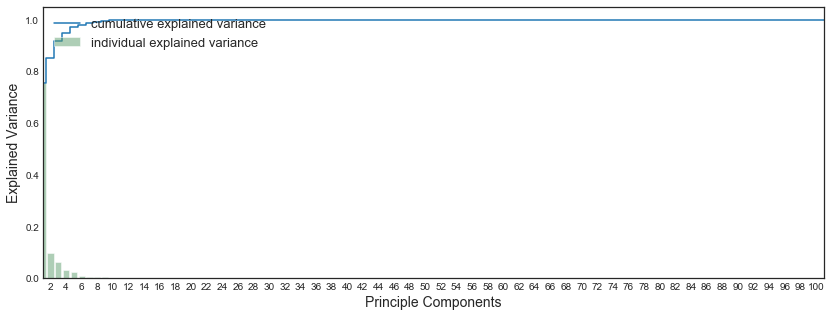

In [122]:
fig, ax = plt.subplots(figsize = (14,5))
sns.set(font_scale = 1)
plt.step(range(df_scaled.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', 
         label = 'cumulative explained variance')
sns.barplot(np.arange(1, df_scaled.shape[1]+1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
           label = 'individual explained variance')
plt.xlim(0,100)

ax.set_xticklabels([s if int (s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained Variance', fontsize = 14)
plt.xlabel('Principle Components', fontsize = 14)
plt.legend(loc = "upper left", fontsize = 13)

**As the data is label encoded and we cannot scale this data, so it is a bad idea to apply PCA on such a data**

### Feature Selection: `Random Forest`

In [123]:
X = df_scaled.copy(deep=True)
X.head()

,tot_page_views,tot_page_views_l30d,internal_search_events,buy_now_events,download_trial_events,support_search_events,get_pricing_events,product_view_events,campaign_view_events,purchase_events,...,ftr_dummy_citdb_ent_server7,ftr_dummy_citdb_ent_serverUnknown,ftr_dummy_geo_dunssiteAMER,ftr_dummy_geo_dunssiteAPAC,ftr_dummy_geo_dunssiteAPACtoOTHER,ftr_dummy_geo_dunssiteEMEA,ftr_dummy_geo_dunssiteUnknown,ftr_dummy_record_typeORGANIZATION,ftr_dummy_record_typePERSON,ftr_dummy_record_typeUnknown
0,-0.132938,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
1,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,-0.572750,...,0,1,0,0,0,0,1,0,0,1
2,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,0,1,0,0,1
3,-0.145299,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0
4,-0.157659,-0.10188,-0.049165,-0.051373,-0.011927,-0.011505,-0.003162,-0.084027,-0.079769,0.627707,...,0,1,0,0,0,1,0,0,1,0


In [124]:
feature_name = X.columns.tolist()
X.shape

(100000, 308)

In [125]:
X.select_dtypes(['object']).nunique()

flag_prodA_customer                          2
flag_prodA_5_x_customer                      2
flag_prodB_customer                          2
flag_prodC_customer                          2
flag_prodD_customer                          2
flag_prodE_customer                          2
flag_prodF_customer                          2
flag_prodG_customer                          2
flag_prodH_customer                          2
flag_prodJ_customer                          2
flag_prodO_customer                          2
flag_prodI_customer                          2
flag_prodK_avail_svcs_customer               1
flag_prodK_prodW_svcs_customer               2
flag_prodK_network_svcs_customer             1
flag_prodK_customer                          2
flag_draas_customer                          1
flag_prodL_customer                          2
flag_prodN_customer                          2
flag_prodM_customer                          2
flag_prodT_customer                          2
flag_prodT_li

In [126]:
X[X.select_dtypes(['object']).columns] = X.select_dtypes(['object']).apply(lambda x: x.astype('category'))
X.shape

(100000, 308)

In [127]:
X.select_dtypes(['category']).nunique()

db_city                                      551
db_companyname                               462
db_country                                    85
db_employeerange                               7
db_audience                                  104
db_subindustry                               136
flag_prodA_customer                            2
flag_prodA_5_x_customer                        2
flag_prodB_customer                            2
flag_prodC_customer                            2
flag_prodD_customer                            2
flag_prodE_customer                            2
flag_prodF_customer                            2
flag_prodG_customer                            2
flag_prodH_customer                            2
flag_prodJ_customer                            2
flag_prodO_customer                            2
flag_prodI_customer                            2
flag_prodK_avail_svcs_customer                 1
flag_prodK_prodW_svcs_customer                 2
flag_prodK_network_s

**Function to get the feature importance**

In [128]:
def fn_Feature_Importance(X_train,y_train,model_estimator, thres):
    estimator_selector = SelectFromModel(estimator=model_estimator, threshold=thres)
    estimator_selector.fit(X_train, y_train)
    
    estimator_support = estimator_selector.get_support()
    estimator_feature = X_train.loc[:,estimator_support].columns.tolist()
    print(str(len(estimator_feature)), 'selected features')
    
    return estimator_support, estimator_feature

### FS:`Random Forest`

In [129]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_support, rf_feature = fn_Feature_Importance(X,Y,rf_model,'1.25*median')

143 selected features


### FS: `LightGBM`

In [131]:
# lgbc_model=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
#             reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

lgbc_model=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, random_state=42)

lgb_support, lgb_feature = fn_Feature_Importance(X,Y,lgbc_model,'1.25*median')

150 selected features


### FS: `Recursive Feature Elimination`

In [132]:
# rfe_model = RFE(estimator=LogisticRegression(), n_features_to_select=140, step=10, verbose=5)
# rfe_support, rfe_feature = fn_Feature_Importance(X,Y,rfe_model,'1.25*median')

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=150, step=20, verbose=5)
rfe_selector.fit(X, Y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 308 features.
Fitting estimator with 288 features.
Fitting estimator with 268 features.
Fitting estimator with 248 features.
Fitting estimator with 228 features.
Fitting estimator with 208 features.
Fitting estimator with 188 features.
Fitting estimator with 168 features.
150 selected features


### FS: `Logistic (Penalty-'l1')`

In [133]:
lr_model = LogisticRegression(penalty="l1", random_state=42)
lr_support, lr_feature = fn_Feature_Importance(X,Y,lr_model,'1.25*median')

143 selected features


### FS: `ANOVA F-value`

In [134]:
# f_classif_model = SelectKBest(f_classif, k=140)
# f_classif_support, f_classif_feature = fn_Feature_Importance(X,Y,f_classif_model,'1.25*median')


from sklearn.feature_selection import f_classif
f_classif_selector = SelectKBest(f_classif, k=140)
f_classif_selector.fit(X, Y)

f_classif_support = f_classif_selector.get_support()
f_classif_feature = X.loc[:,f_classif_support].columns.tolist()
print(str(len(f_classif_feature)), 'selected features')

140 selected features


**Summarizing the feature selection**

In [136]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 
                                     'Random Forest':rf_support,
                                     'LightGBM':lgb_support,
                                     'RFE':rfe_support, 
                                     'Logistics':lr_support,
                                     'f_classif':f_classif_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the top 150
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(150)

,Feature,Random Forest,LightGBM,RFE,Logistics,f_classif,Total
1,total_prodV_bookings_amount,True,True,True,True,True,5
2,prodV_booking_pct,True,True,True,True,True,5
3,prodG_booking_pct,True,True,True,True,True,5
4,prodG_2015_bookings_amount,True,True,True,True,True,5
5,prodA_qty,True,True,True,True,True,5
6,prodA_2015_bookings_amount,True,True,True,True,True,5
7,num_orders,True,True,True,True,True,5
8,num_order_lines,True,True,True,True,True,5
9,idm_no_of_day_visits_to_license_page,True,True,True,True,True,5
10,hyperthreading_active_flag,True,True,True,True,True,5


**Final list of selected feature **

In [137]:
lst_FinalFeatures = feature_selection_df[(feature_selection_df['Total'] == 5)]['Feature'].values.tolist()
# lst_FinalFeatures = feature_selection_df[(feature_selection_df['Total'] == 5) | 
#                                          (feature_selection_df['Total'] == 4)]['Feature'].values.tolist()

# lst_FinalFeatures.extend(['tot_store_workstation_pro_product_page_views', 
#                           'tot_store_workstation_player_product_page_views'])

lst_FinalFeatures

['total_prodV_bookings_amount',
 'prodV_booking_pct',
 'prodG_booking_pct',
 'prodG_2015_bookings_amount',
 'prodA_qty',
 'prodA_2015_bookings_amount',
 'num_orders',
 'num_order_lines',
 'idm_no_of_day_visits_to_license_page',
 'hyperthreading_active_flag',
 'hv_replay_capable_flag',
 'gu_emp_segment',
 'gu_country_geo',
 'ftr_growth_prodG_13_14',
 'ftr_dummy_record_typeUnknown',
 'ftr_dummy_record_typePERSON',
 'ftr_dummy_record_typeORGANIZATION',
 'ftr_dummy_idc_verticalsUnknown',
 'ftr_dummy_idc_verticalsServices',
 'ftr_dummy_idc_verticalsRetail__Wholesale',
 'ftr_dummy_highest_prodA_edition3',
 'ftr_dummy_gu_emp_segment_descVery_Small_SMB',
 'ftr_dummy_gu_emp_segment_descUnknown',
 'ftr_dummy_gu_emp_segment_descSmall_SMB',
 'ftr_dummy_gu_emp_segment_descEnterprise',
 'ftr_dummy_gu_emp_segment_descCommercial',
 'ftr_dummy_geo_dunssiteEMEA',
 'ftr_dummy_geo_dunssiteAMER',
 'ftr_dummy_db_industryUnknown',
 'ftr_dummy_db_industrySoftware__Technology',
 'ftr_dummy_db_industryManufactu

In [138]:
len(lst_FinalFeatures)

45

### Sampling Techniques(Up/Down/Synthetic sampling)

In [139]:
X_train = X[lst_FinalFeatures]
X_train.shape

(100000, 45)

In [140]:
train_cols = X_train.columns.values

In [141]:
y_train = Y
y_train.shape

(100000, 1)

**Splitting the `train` data into `train+validation`**  
Do split the train data into train and validation before make it balanced, otherwise validation data might also contain the entries available in the training data. This will cause problem in generalising the model using validation accuracy.

In [143]:
imb_X_train, imb_X_test, imb_y_train, imb_y_test = train_test_split(X_train, y_train, train_size = 0.7,
                                                                  test_size = 0.3, random_state = 42, stratify = y_train)

In [144]:
print('Dimensions of {}:{}'.format('imb_X_train', imb_X_train.shape))
print('Dimensions of {}:{}'.format('imb_X_test',  imb_X_test.shape))
print('Dimensions of {}:{}'.format('imb_y_train', imb_y_train.shape))
print('Dimensions of {}:{}'.format('imb_y_test',  imb_y_test.shape))

Dimensions of imb_X_train:(70000, 45)
Dimensions of imb_X_test:(30000, 45)
Dimensions of imb_y_train:(70000, 1)
Dimensions of imb_y_test:(30000, 1)


**SMOTE**: `Synthetic Minority Oversampling Technique`

In [145]:
smt = SMOTE()
smt_X_train, smt_y_train = smt.fit_sample(imb_X_train, imb_y_train)
np.bincount(smt_y_train)

array([67550, 67550], dtype=int64)

In [146]:
print('Dimensions of {}:{}'.format('smt_X_train', smt_X_train.shape))
print('Dimensions of {}:{}'.format('smt_y_train',  smt_y_train.shape))

Dimensions of smt_X_train:(135100, 45)
Dimensions of smt_y_train:(135100,)


In [147]:
smt_X_train = pd.DataFrame(smt_X_train)
smt_X_train.columns = train_cols

### Model Selection

`Name the probable classifiers -`

In [151]:
MLA = [
        # Logistic Regression
        LogisticRegression(class_weight = 'balanced'),
    
        # Random Forest Classifier
        RandomForestClassifier(class_weight = 'balanced'),
    
        # Gradient Boosting Classifier
        GradientBoostingClassifier(),
    
        # Adaptive boosting
        AdaBoostClassifier(),
    
        # Decision Tree classifier
        DecisionTreeClassifier(class_weight = 'balanced')
]

Create table to compare MLA metrics

In [152]:
MLA_CV_columns = ['MLA Name',
                  'MLA Parameters',
                  'MLA train score mean',
                  'MLA test score mean',
                  #'MLA test score 3*STD',
                  'MLA Time']

MLA_columns = ['MLA Name',
              'MLA Parameters',
              'Accuracy',
              'Recall',
              'Precision',
              'AUC',
              'F1 Score']

MLA_compare    = pd.DataFrame(columns=MLA_columns)
MLA_CV_compare = pd.DataFrame(columns=MLA_CV_columns)

In [153]:
MLA_compare

,MLA Name,MLA Parameters,Accuracy,Recall,Precision,AUC,F1 Score


In [154]:
MLA_CV_compare

,MLA Name,MLA Parameters,MLA train score mean,MLA test score mean,MLA Time


Run the ML's with default parameters + imbalaned dataset + just train & validation (no cross validation)

In [155]:
MLA_predict = pd.DataFrame(imb_y_test).rename(columns ={0:'actual_workstation_purchase_flag'})

# index through MLA and save performance to table
row_index = 0
for algo in MLA:
    # set name and the parameters
    MLA_name = algo.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(algo.get_params())
    
    algo.fit(smt_X_train, smt_y_train)
    MLA_predict[MLA_name] = algo.predict(imb_X_test)
    probs = algo.predict_proba(imb_X_test)[:,1]
    
    MLA_compare.loc[row_index, 'Accuracy']     = round(100*accuracy_score(imb_y_test,MLA_predict[MLA_name]),2)
    MLA_compare.loc[row_index, 'Recall']       = round(100*recall_score(imb_y_test,MLA_predict[MLA_name]),2)
    MLA_compare.loc[row_index, 'Precision']    = round(100*precision_score(imb_y_test,MLA_predict[MLA_name]),2)
    MLA_compare.loc[row_index, 'F1 Score']     = round(100*f1_score(imb_y_test,MLA_predict[MLA_name]),2)
    MLA_compare.loc[row_index, 'AUC']          = round(100*roc_auc_score(imb_y_test,probs),2)
    
    row_index += 1

MLA_compare

,MLA Name,MLA Parameters,Accuracy,Recall,Precision,AUC,F1 Score
0,LogisticRegression,"{'C': 1.0, 'class_weight': 'balanced', 'dual':...",80.37,86.29,13.62,86.16,23.53
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': 'balanced'...",93.89,21.9,18.49,82.44,20.05
2,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",85.56,71.05,15.63,88.25,25.62
3,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",82.38,80.48,14.26,86.32,24.23
4,DecisionTreeClassifier,"{'class_weight': 'balanced', 'criterion': 'gin...",92.53,27.43,16.31,61.1,20.45


Run the ML's with default parameters + imbalaned dataset + just train & validation (cross validation)

In [156]:
cv_split = ShuffleSplit(n_splits=3, train_size=0.7, test_size=0.3, random_state=42)

In [157]:
MLA_CV_predict = pd.DataFrame(imb_y_test).rename(columns ={0:'actual_workstation_purchase_flag'})

# index through MLA and save performance to table
row_index = 0
for algo in MLA:
    # set name and the parameters
    MLA_name = algo.__class__.__name__
    MLA_CV_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_CV_compare.loc[row_index, 'MLA Parameters'] = str(algo.get_params())
    
    # score model with cross validation
    cv_results = cross_validate(algo, imb_X_train, imb_y_train, scoring= 'roc_auc', cv=cv_split, n_jobs=-1)
    
    MLA_CV_compare.loc[row_index, 'MLA Time']              = 100*cv_results['fit_time'].mean()
    MLA_CV_compare.loc[row_index, 'MLA train score mean']  = 100*cv_results['train_score'].mean()
    MLA_CV_compare.loc[row_index, 'MLA test score mean']   = 100*cv_results['test_score'].mean()
    
#     # if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
#     # should statistically capture 99.7% of the subsets
#     MLA_compare.loc[row_index, 'MLA test score 3*STD']  = cv_results['test_score'].std()*3
    
    algo.fit(imb_X_train, imb_y_train)
    MLA_CV_predict[MLA_name] = algo.predict(imb_X_test)
    
    row_index += 1

MLA_CV_compare

,MLA Name,MLA Parameters,MLA train score mean,MLA test score mean,MLA Time
0,LogisticRegression,"{'C': 1.0, 'class_weight': 'balanced', 'dual':...",86.8773,86.8366,360.339
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': 'balanced'...",99.592,76.1388,164.003
2,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",90.7288,89.672,2279.11
3,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",88.7971,88.1259,713.094
4,DecisionTreeClassifier,"{'class_weight': 'balanced', 'criterion': 'gin...",99.9665,56.9062,181.003


AS per the above data, gradient boosting ML is a good contender of being choosen as a final model

### Model Building

As per the above results, all the other ML's except Decision Tree is providing fine 'roc-auc' value, so I am going to tune their hyperparamters and try to get the good model to predict the test data.

In this part, the objective will be to adjust a classifier that will classify consumers in the different client categories that were established in the previous section. The objective is to make this classification possible at the first visit. To fulfill this objective, I will test several classifiers implemented in scikit-learn. First, in order to simplify their use, I define a class that allows to interface several of the functionalities common to these different classifiers:

All classes have a function called `__init__()`, which is always executed when the class is being initiated. Use the __init__() function to assign values to object properties, or other operations that are necessary to do when the object is being created.

`Objects` are an encapsulation of variables and functions into a single entity. Objects get their variables and functions from classes. `Classes` are essentially a template to create your objects.

The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class. It does not have to be named self , you can call it whatever you like, but it has to be the first parameter of any function in the class-

**Class_Fit**

In [158]:
class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)   # Call predict method
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)   # Call predict probability method
    
    def cross_valid(self, x_train, y_train, matrix, cv_param):
        self.cv_results = cross_validate(estimator=self.clf, X=x_train, y=y_train, scoring=matrix, cv=cv_param)
    
    def grid_search(self, parameters, cv_param):
        self.grid = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=cv_param)   # Define new variable 'grid'
        
    def grid_fit(self,X,Y):                      # Defining method inside the object (Class_Fit)
        self.grid.fit(X,Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print('Accuracy:{:.2f}%'.format(100*accuracy_score(Y, self.predictions)))
        print(30*'_')
        print('Recall/Sensitivity:{:.2f}%'.format(100*recall_score(Y, self.predictions)))
        print(30*'_')
        print('Precision:{:.2f}%'.format(100*precision_score(Y, self.predictions)))
        print(30*'_')
        print('F1 Score:{:.2f}%'.format(100*f1_score(Y, self.predictions)))

#### Confusion Matrix
This function plots the confusion matrix of passed classifier.

In [159]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # Convert the denominator into column vector
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # example - product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

**Learning Curve**

A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample.

In [160]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel('Training examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross Validation score')
    
    plt.legend(loc="best")
    return plt

Create a table to consolidate the final results

In [161]:
comparison_columns = ['Accuracy',
                      'Recall',
                      'Precision',
                      'AUC',
                      'F1 Score']

comparison_rows = ['Imbalanced', 
                   'SMOTE', 
                 #  'Under-Sample Data'
                  ]

### Logistic Regression (Imbalanced data)

In [239]:
LR_compare = pd.DataFrame(columns=comparison_columns, index=comparison_rows)
LR_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,NaN,NaN,NaN,NaN,NaN
SMOTE,NaN,NaN,NaN,NaN,NaN


Parameters to tune in the model. Result is based on cross-validation

In [240]:
param_grid = [{'C'            :np.logspace(-2,2,20),
               'penalty'      :['l1', 'l2'],
               'class_weight' :['balanced'],
               'random_state' :[42]
              }]

Fittng and Tuning the data

In [241]:
lr_norm_model = Class_Fit(clf=LogisticRegression)
lr_norm_model.train(imb_X_train, imb_y_train)
lr_norm_model.predict(imb_X_test)

#--------------------------------------------
lr_norm_model.grid_search(parameters =param_grid , cv_param = cv_split)
lr_norm_model.grid_fit(imb_X_train, imb_y_train)
lr_norm_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:80.03%
______________________________
Recall/Sensitivity:86.86%
______________________________
Precision:13.48%
______________________________
F1 Score:23.34%


Confusion matrix

Confusion matrix, without normalization


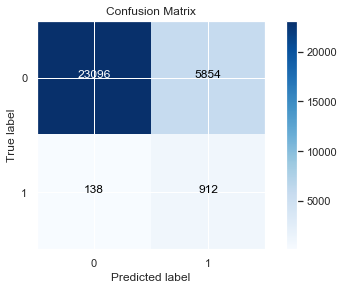

In [242]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, lr_norm_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

<Figure size 864x576 with 0 Axes>

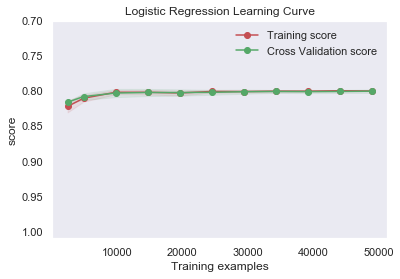

In [243]:
plt.figure(figsize = (12,8))
g = plot_learning_curve(lr_norm_model.grid.best_estimator_, "Logistic Regression Learning Curve", imb_X_train, imb_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [244]:
lr_norm_model.grid.best_estimator_

LogisticRegression(C=37.92690190732246, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [245]:
probs = lr_norm_model.predict_proba(imb_X_test)
probs = probs[:, 1]

auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.862


**`AUC-ROC` Plot**

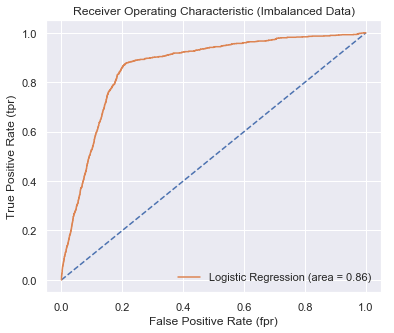

In [246]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)
#-----------------------------------------------------
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Imbalanced Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('Log_ROC_imb')
plt.show()                                     # show the plot

[**`Precision-Recall` Curves**](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [247]:
yhat = lr_norm_model.predict(imb_X_test)
#------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.037 auc=0.175 ap=0.176


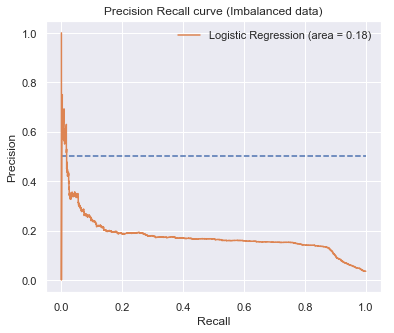

In [248]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Logistic Regression (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Imbalanced data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('Log_PRC_imb')
plt.show()                                      # show the plot

In [249]:
LR_compare.loc['Imbalanced', 'Accuracy']     = round(100*accuracy_score(imb_y_test,yhat),2)
LR_compare.loc['Imbalanced', 'Recall']       = round(100*recall_score(imb_y_test,yhat),2)
LR_compare.loc['Imbalanced', 'Precision']    = round(100*precision_score(imb_y_test,yhat),2)
LR_compare.loc['Imbalanced', 'F1 Score']     = round(100*f1_score(imb_y_test,yhat),2)
LR_compare.loc['Imbalanced', 'AUC']          = round(100*roc_auc_score(imb_y_test,probs),2)

LR_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.49,1.9,47.62,86.21,3.66
SMOTE,NaN,NaN,NaN,NaN,NaN


### Logistic Regression (Over-Sampled data)

Parameters to tune in the model. Result is based on cross-validation

In [250]:
param_grid = [{'C'            :np.logspace(-2,2,20),
               'penalty'      :['l1', 'l2'],
               'random_state' :[42]
              }]

Fittng and Tuning the data

In [251]:
lr_ovrS_model = Class_Fit(clf=LogisticRegression)
lr_ovrS_model.train(smt_X_train, smt_y_train)
lr_ovrS_model.predict(imb_X_test)

#--------------------------------------
lr_ovrS_model.grid_search(parameters =param_grid , cv_param = cv_split)
lr_ovrS_model.grid_fit(smt_X_train, smt_y_train)
lr_ovrS_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:80.39%
______________________________
Recall/Sensitivity:86.29%
______________________________
Precision:13.64%
______________________________
F1 Score:23.55%


Confusion matrix

Confusion matrix, without normalization


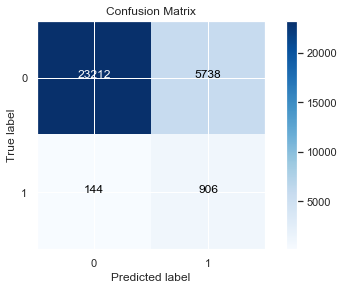

In [252]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, lr_ovrS_model.predictions)
np.set_printoptions(precision=2)
#plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

<Figure size 864x576 with 0 Axes>

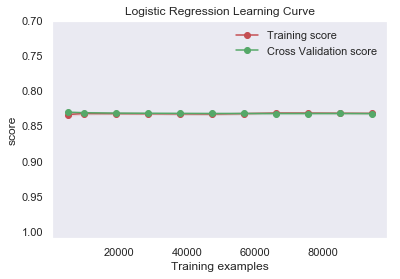

In [253]:
plt.figure(figsize = (12,8))
g = plot_learning_curve(lr_ovrS_model.grid.best_estimator_, "Logistic Regression Learning Curve", smt_X_train, smt_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [254]:
x = lr_ovrS_model.grid.best_estimator_

LogisticRegression(C=0.18329807108324356, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [255]:
probs = lr_ovrS_model.predict_proba(imb_X_test)
probs = probs[:, 1]

auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.862


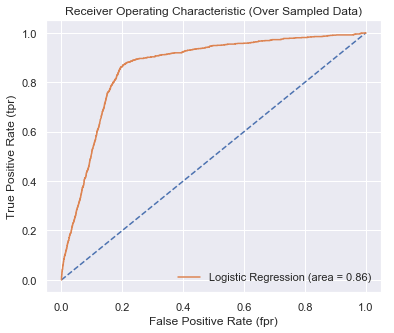

In [256]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Over Sampled Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('Log_ROC_smote')
plt.show() 

In [257]:
yhat = lr_ovrS_model.predict(imb_X_test)
#------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.235 auc=0.173 ap=0.173


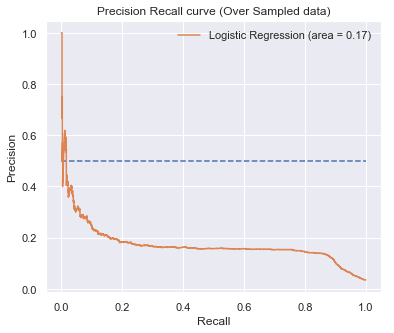

In [258]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Logistic Regression (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Over Sampled data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('Log_PRC_smote')
plt.show()                                      # show the plot

In [259]:
LR_compare.loc['SMOTE', 'Accuracy']     = round(100*accuracy_score(imb_y_test,yhat),2)
LR_compare.loc['SMOTE', 'Recall']       = round(100*recall_score(imb_y_test,yhat),2)
LR_compare.loc['SMOTE', 'Precision']    = round(100*precision_score(imb_y_test,yhat),2)
LR_compare.loc['SMOTE', 'F1 Score']     = round(100*f1_score(imb_y_test,yhat),2)
LR_compare.loc['SMOTE', 'AUC']          = round(100*roc_auc_score(imb_y_test,probs),2)

LR_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.49,1.9,47.62,86.21,3.66
SMOTE,80.41,86.19,13.64,86.16,23.55


### Random Forest (imbalanced data)

In [272]:
RF_compare = pd.DataFrame(columns=comparison_columns, index=comparison_rows)
RF_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,NaN,NaN,NaN,NaN,NaN
SMOTE,NaN,NaN,NaN,NaN,NaN


Parameters to tune in the model. Result is based on cross-validation

In [273]:
param_grid = [{'n_estimators' :[100, 200, 300],
               'criterion'    :['gini'],
               'max_depth'    :[2, 4, 6, None],
               'class_weight' :['balanced', 'balanced_subsample'],
               'random_state' :[42]
              }]

Fittng and Tuning the data

In [274]:
RF_norm_model = Class_Fit(clf=RandomForestClassifier)
RF_norm_model.train(imb_X_train, imb_y_train)
RF_norm_model.predict(imb_X_test)
#----------------------------------------
RF_norm_model.grid_search(parameters =param_grid , cv_param = cv_split)
RF_norm_model.grid_fit(imb_X_train, imb_y_train)
RF_norm_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:95.32%
______________________________
Recall/Sensitivity:5.05%
______________________________
Precision:11.52%
______________________________
F1 Score:7.02%


In [275]:
RF_norm_model.grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

Confusion matrix

Confusion matrix, without normalization


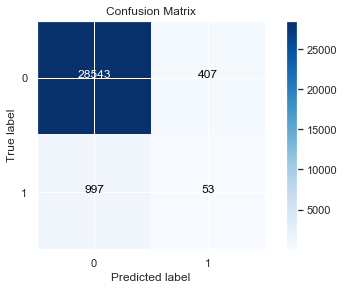

In [276]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, RF_norm_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

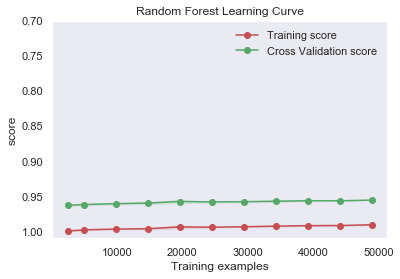

In [277]:
#plt.figure(figsize = (12,8))
g = plot_learning_curve(RF_norm_model.grid.best_estimator_, "Random Forest Learning Curve", imb_X_train, imb_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [278]:
probs = RF_norm_model.predict_proba(imb_X_test)
probs = probs[:, 1]

#---------------------------------------------
auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.785


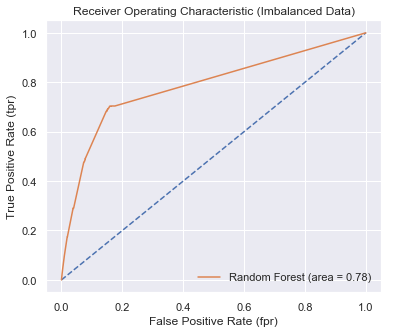

In [279]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Imbalanced Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('RF_ROC_imb')
plt.show()

In [280]:
yhat = RF_norm_model.predict(imb_X_test)
#-----------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.083 auc=0.176 ap=0.154


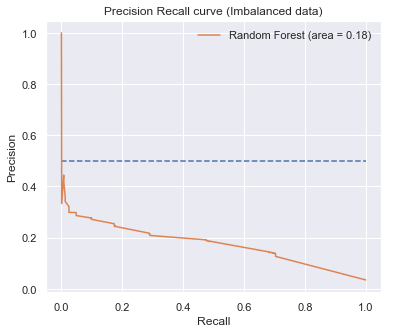

In [281]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Random Forest (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Imbalanced data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('RF_PRC_imb')
plt.show()                                      # show the plot

Validation dataset prediction scores by training Random forest classifier on imbalanced dataset (with best parameters)

In [282]:
RF_compare.loc['Imbalanced', 'Accuracy']        = round(100*accuracy_score(imb_y_test,yhat),2)
RF_compare.loc['Imbalanced', 'Recall']          = round(100*recall_score(imb_y_test,yhat),2)
RF_compare.loc['Imbalanced', 'Precision']       = round(100*precision_score(imb_y_test,yhat),2)
RF_compare.loc['Imbalanced', 'F1 Score']        = round(100*f1_score(imb_y_test,yhat),2)
RF_compare.loc['Imbalanced', 'AUC']             = round(100*roc_auc_score(imb_y_test,probs),2)

RF_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.25,4.86,28.65,78.46,8.31
SMOTE,NaN,NaN,NaN,NaN,NaN


### Random Forest (Over-Sampled data)

Parameters to tune in the model. Result is based on cross-validation

In [283]:
param_grid = [{'n_estimators' :[100, 200, 300],
               'criterion'    :['gini', 'entropy'],
               'max_depth'    :[2, 4, 6, None],
               'random_state' :[42]
              }]

Fittng and Tuning the data

In [284]:
RF_ovrS_model = Class_Fit(clf=RandomForestClassifier)
RF_ovrS_model.train(smt_X_train, smt_y_train)
RF_ovrS_model.predict(imb_X_test)

#--------------------------------------------------
RF_ovrS_model.grid_search(parameters =param_grid , cv_param = cv_split)
RF_ovrS_model.grid_fit(smt_X_train, smt_y_train)
RF_ovrS_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:94.03%
______________________________
Recall/Sensitivity:23.24%
______________________________
Precision:19.84%
______________________________
F1 Score:21.40%


Confusion matrix

Confusion matrix, without normalization


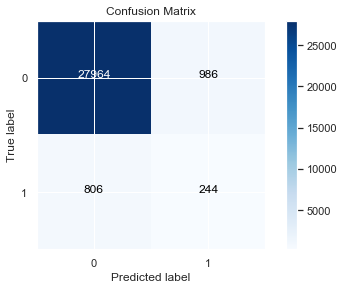

In [285]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, RF_ovrS_model.predictions)
np.set_printoptions(precision=2)
#plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

<Figure size 864x576 with 0 Axes>

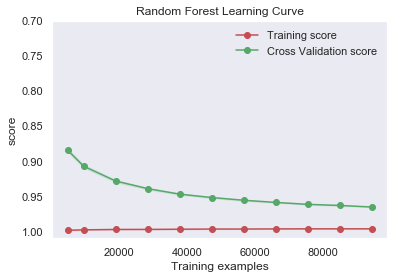

In [286]:
plt.figure(figsize = (12,8))
g = plot_learning_curve(RF_ovrS_model.grid.best_estimator_, "Random Forest Learning Curve", smt_X_train, smt_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [287]:
RF_ovrS_model.grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [288]:
probs = RF_ovrS_model.predict_proba(imb_X_test)
probs = probs[:, 1]

auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.822


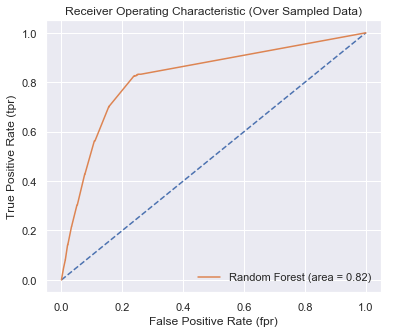

In [289]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Over Sampled Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('RF_PRC_smote')
plt.show()

In [290]:
yhat = RF_ovrS_model.predict(imb_X_test)
#---------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#--------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.204 auc=0.158 ap=0.141


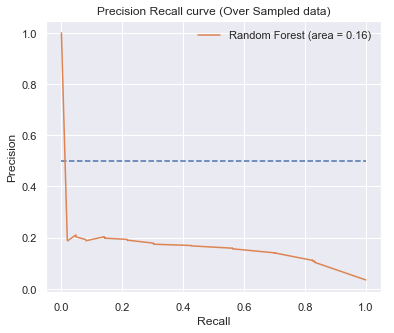

In [291]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Random Forest (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Over Sampled data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('RF_PRC_smote')
plt.show()                                      # show the plot

In [292]:
RF_compare.loc['SMOTE', 'Accuracy']     = round(100*accuracy_score(imb_y_test,yhat),2)
RF_compare.loc['SMOTE', 'Recall']       = round(100*recall_score(imb_y_test,yhat),2)
RF_compare.loc['SMOTE', 'Precision']    = round(100*precision_score(imb_y_test,yhat),2)
RF_compare.loc['SMOTE', 'F1 Score']     = round(100*f1_score(imb_y_test,yhat),2)
RF_compare.loc['SMOTE', 'AUC']          = round(100*roc_auc_score(imb_y_test,probs),2)

RF_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.25,4.86,28.65,78.46,8.31
SMOTE,93.97,22.1,18.97,82.22,20.41


### Gradient Boosting (Imbalanced Data)

In [162]:
GB_compare = pd.DataFrame(columns=comparison_columns, index=comparison_rows)
GB_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,NaN,NaN,NaN,NaN,NaN
SMOTE,NaN,NaN,NaN,NaN,NaN


Parameters to tune in the model. Result is based on cross-validation

In [163]:
param_grid = [{'learning_rate':[0.01,0.1, 1],
               'n_estimators' :[100, 200, 300],
               'max_depth'    :np.linspace(2, 10, 5, endpoint=True),
               'min_impurity_split' : [1e-7, 1e-5],
               'max_features' :['sqrt','log2', None],
               'random_state' :[42],
               'verbose'     : [0] 
              }]

Fittng and Tuning the data

In [164]:
gb_norm_model = Class_Fit(clf=GradientBoostingClassifier)
gb_norm_model.train(imb_X_train, imb_y_train)
gb_norm_model.predict(imb_X_test)
#----------------------------------------
gb_norm_model.grid_search(parameters =param_grid , cv_param = cv_split)
gb_norm_model.grid_fit(imb_X_train, imb_y_train)
gb_norm_model.grid_predict(imb_X_test, imb_y_test)

KeyboardInterrupt: 

In [ ]:
gb_norm_model.grid.best_estimator_

Confusion matrix

In [ ]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, gb_norm_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

In [ ]:
Learning Curve

In [ ]:
#plt.figure(figsize = (12,8))
g = plot_learning_curve(gb_norm_model.grid.best_estimator_, "Gradient Boosting Learning Curve", imb_X_train, imb_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
probs = gb_norm_model.predict_proba(imb_X_test)
probs = probs[:, 1]

#---------------------------------------------
auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)
#---------------------------------------------------------
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Imbalanced Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('GB_ROC_imb')
plt.show()

In [ ]:
yhat = gb_norm_model.predict(imb_X_test)
#-----------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

In [ ]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Gradient Boosting (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Imbalanced data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('GB_PRC_imb')
plt.show()                                      # show the plot

Validation dataset prediction scores by training Random forest classifier on imbalanced dataset (with best parameters)

In [ ]:
GB_compare.loc['Imbalanced', 'Accuracy']        = round(100*accuracy_score(imb_y_test,yhat),2)
GB_compare.loc['Imbalanced', 'Recall']          = round(100*recall_score(imb_y_test,yhat),2)
GB_compare.loc['Imbalanced', 'Precision']       = round(100*precision_score(imb_y_test,yhat),2)
GB_compare.loc['Imbalanced', 'F1 Score']        = round(100*f1_score(imb_y_test,yhat),2)
GB_compare.loc['Imbalanced', 'AUC']             = round(100*roc_auc_score(imb_y_test,probs),2)

GB_compare

### Gradient Boosting (Over Sample Data)

Parameters to tune in the model. Result is based on cross-validation

In [ ]:
param_grid = [{'learning_rate':[0.01,0.1, 1],
               'n_estimators' :[100, 200, 300],
               'max_depth'    :np.linspace(2, 10, 5, endpoint=True),
               'min_impurity_split' : [1e-7, 1e-5],
               'max_features' :['sqrt','log2', None],
               'random_state' :[42],
               'verbose'     : [0] 
              }]

Fittng and Tuning the data

In [ ]:
gb_ovrS_model = Class_Fit(clf=GradientBoostingClassifier)
gb_ovrS_model.train(smt_X_train, smt_y_train)
gb_ovrS_model.predict(imb_X_test)
#----------------------------------------
gb_ovrS_model.grid_search(parameters =param_grid , cv_param = cv_split)
gb_ovrS_model.grid_fit(smt_X_train, smt_y_train)
gb_ovrS_model.grid_predict(imb_X_test, imb_y_test)

In [ ]:
gb_ovrS_model.grid.best_estimator_

Confusion matrix

In [ ]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, gb_ovrS_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

In [ ]:
#plt.figure(figsize = (12,8))
g = plot_learning_curve(gb_ovrS_model.grid.best_estimator_, "Gradient Boosting Learning Curve", smt_X_train, smt_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
probs = gb_ovrS_model.predict_proba(imb_X_test)
probs = probs[:, 1]

#---------------------------------------------
auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)
#---------------------------------------------------------

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Over Sampled Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('GB_ROC_smote')
plt.show()

In [ ]:
yhat = gb_ovrS_model.predict(imb_X_test)
#-----------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

In [ ]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Gradient Boosting (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Over Sampled data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('GB_PRC_smote')
plt.show()                                      # show the plot

Validation dataset prediction scores by training Random forest classifier on imbalanced dataset (with best parameters)

In [ ]:
GB_compare.loc['SMOTE', 'Accuracy']        = round(100*accuracy_score(imb_y_test,yhat),2)
GB_compare.loc['SMOTE', 'Recall']          = round(100*recall_score(imb_y_test,yhat),2)
GB_compare.loc['SMOTE', 'Precision']       = round(100*precision_score(imb_y_test,yhat),2)
GB_compare.loc['SMOTE', 'F1 Score']        = round(100*f1_score(imb_y_test,yhat),2)
GB_compare.loc['SMOTE', 'AUC']             = round(100*roc_auc_score(imb_y_test,probs),2)

GB_compare

### Adaptive Boosting (Imbalaned Data)

In [293]:
ADB_compare = pd.DataFrame(columns=comparison_columns, index=comparison_rows)
ADB_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,NaN,NaN,NaN,NaN,NaN
SMOTE,NaN,NaN,NaN,NaN,NaN


Parameters to tune in the model. Result is based on cross-validation

In [294]:
rf = RandomForestClassifier(class_weight='balanced_subsample')

In [295]:
param_grid = [{'n_estimators'   :[100, 200, 300],
               'base_estimator' :[rf],
               'learning_rate'  :[0.01,0.1, 1],
               'random_state'   :[42]
              }]

Fittng and Tuning the data

In [296]:
adb_norm_model = Class_Fit(clf=AdaBoostClassifier)
adb_norm_model.train(imb_X_train, imb_y_train)
adb_norm_model.predict(imb_X_test)
#----------------------------------------
adb_norm_model.grid_search(parameters =param_grid , cv_param = cv_split)
adb_norm_model.grid_fit(imb_X_train, imb_y_train)
adb_norm_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:95.35%
______________________________
Recall/Sensitivity:4.00%
______________________________
Precision:9.81%
______________________________
F1 Score:5.68%


In [297]:
adb_norm_model.grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=100, random_state=42)

Confusion matrix

Confusion matrix, without normalization


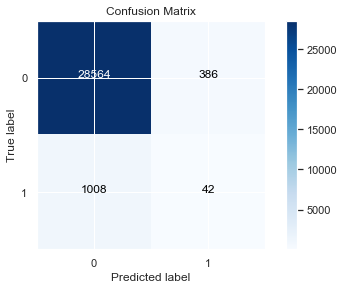

In [298]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, adb_norm_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

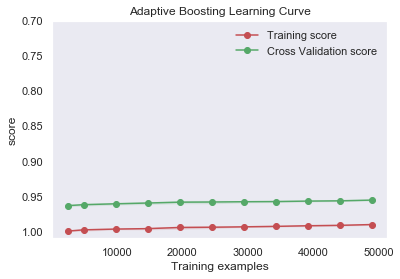

In [299]:
#plt.figure(figsize = (12,8))
g = plot_learning_curve(adb_norm_model.grid.best_estimator_, "Adaptive Boosting Learning Curve", imb_X_train, imb_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [300]:
probs = RF_norm_model.predict_proba(imb_X_test)
probs = probs[:, 1]

#---------------------------------------------
auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.785


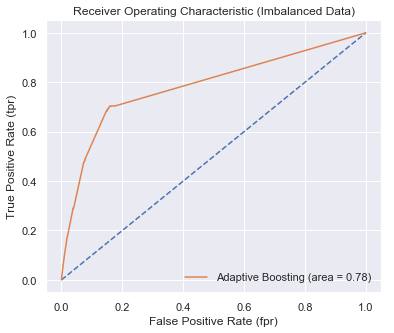

In [301]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Adaptive Boosting (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Imbalanced Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('ADB_ROC_imb')
plt.show()

In [302]:
yhat = adb_norm_model.predict(imb_X_test)
#-----------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.047 auc=0.176 ap=0.154


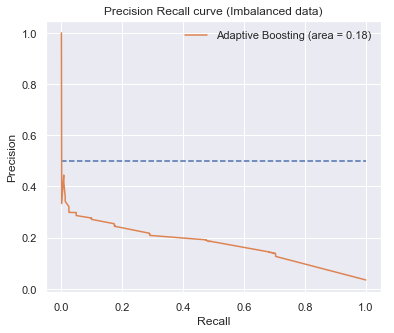

In [303]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Adaptive Boosting (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Imbalanced data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('ADB_PRC_imb')
plt.show()                                      # show the plot

Validation dataset prediction scores by training Random forest classifier on imbalanced dataset (with best parameters)

In [304]:
ADB_compare.loc['Imbalanced', 'Accuracy']        = round(100*accuracy_score(imb_y_test,yhat),2)
ADB_compare.loc['Imbalanced', 'Recall']          = round(100*recall_score(imb_y_test,yhat),2)
ADB_compare.loc['Imbalanced', 'Precision']       = round(100*precision_score(imb_y_test,yhat),2)
ADB_compare.loc['Imbalanced', 'F1 Score']        = round(100*f1_score(imb_y_test,yhat),2)
ADB_compare.loc['Imbalanced', 'AUC']             = round(100*roc_auc_score(imb_y_test,probs),2)

ADB_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.46,2.48,40.62,78.46,4.67
SMOTE,NaN,NaN,NaN,NaN,NaN


### Adaptive Boosting (Over Sampled Data)

Parameters to tune in the model. Result is based on cross-validation

In [305]:
rf = RandomForestClassifier()

In [306]:
param_grid = [{'n_estimators'   :[100, 200, 300],
               'base_estimator' :[rf],
               'learning_rate'  :[0.01,0.1, 1],
               'random_state'   :[42]
              }]

Fittng and Tuning the data

In [307]:
adb_ovrS_model = Class_Fit(clf=AdaBoostClassifier)
adb_ovrS_model.train(smt_X_train, smt_y_train)
adb_ovrS_model.predict(imb_X_test)
#----------------------------------------
adb_ovrS_model.grid_search(parameters =param_grid , cv_param = cv_split)
adb_ovrS_model.grid_fit(smt_X_train, smt_y_train)
adb_ovrS_model.grid_predict(imb_X_test, imb_y_test)

Accuracy:94.44%
______________________________
Recall/Sensitivity:16.10%
______________________________
Precision:17.66%
______________________________
F1 Score:16.84%


In [308]:
adb_ovrS_model.grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=0.1, n_estimators=300, random_state=42)

Confusion matrix

Confusion matrix, without normalization


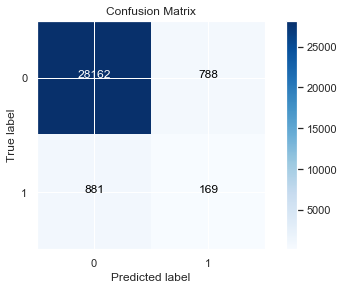

In [309]:
class_names = [i for i in range(2)]
cnf_matrix = confusion_matrix(imb_y_test, adb_ovrS_model.predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, class_names, normalize=False, title = "Confusion Matrix")

Learning Curve

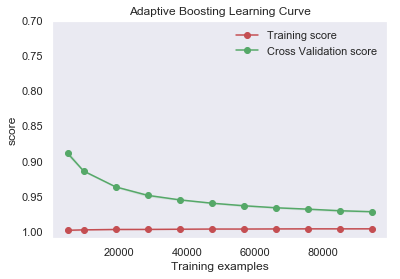

In [310]:
#plt.figure(figsize = (12,8))
g = plot_learning_curve(adb_ovrS_model.grid.best_estimator_, "Adaptive Boosting Learning Curve", smt_X_train, smt_y_train,
                        ylim = [1.01, 0.7], cv = cv_split,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [311]:
probs = adb_ovrS_model.predict_proba(imb_X_test)
probs = probs[:, 1]

#---------------------------------------------
auc_value = roc_auc_score(imb_y_test, probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.860


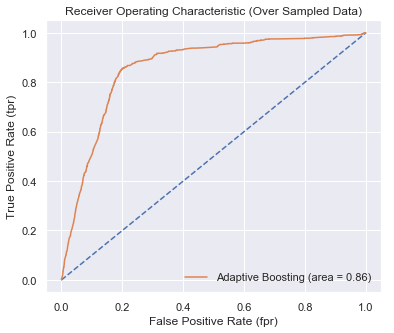

In [312]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(imb_y_test, probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
#plt.plot(fpr, tpr, marker='.')                 # plot the roc curve for the model
plt.plot(fpr, tpr, label='Adaptive Boosting (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Over Sampled Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('ADB_ROC_smote')
plt.show()

In [313]:
yhat = adb_ovrS_model.predict(imb_X_test)
#-----------------------------------------------------------------
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(imb_y_test, probs)
#------------------------------------------------------------------
f1 = f1_score(imb_y_test, yhat)                          # calculate F1 score
auc_value = auc(recall, precision)                             # calculate precision-recall AUC
ap = average_precision_score(imb_y_test, probs)          # calculate average precision score
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_value, ap))

f1=0.242 auc=0.156 ap=0.156


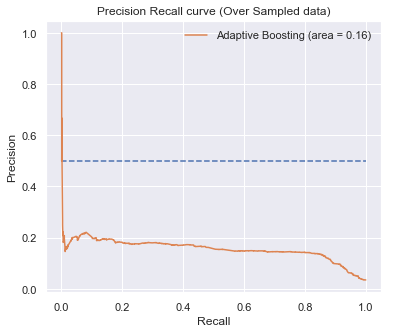

In [314]:
plt.figure(figsize = (6,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')    # plot no skill
plt.plot(recall, precision, label='Adaptive Boosting (area = %0.2f)' % auc_value)         # plot the precision-recall curve for the model
plt.title("Precision Recall curve (Over Sampled data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.savefig('ADB_PRC_smote')
plt.show()                                      # show the plot

Validation dataset prediction scores by training Random forest classifier on imbalanced dataset (with best parameters)

In [315]:
ADB_compare.loc['SMOTE', 'Accuracy']        = round(100*accuracy_score(imb_y_test,yhat),2)
ADB_compare.loc['SMOTE', 'Recall']          = round(100*recall_score(imb_y_test,yhat),2)
ADB_compare.loc['SMOTE', 'Precision']       = round(100*precision_score(imb_y_test,yhat),2)
ADB_compare.loc['SMOTE', 'F1 Score']        = round(100*f1_score(imb_y_test,yhat),2)
ADB_compare.loc['SMOTE', 'AUC']             = round(100*roc_auc_score(imb_y_test,probs),2)

ADB_compare

,Accuracy,Recall,Precision,AUC,F1 Score
Imbalanced,96.46,2.48,40.62,78.46,4.67
SMOTE,82.32,80.48,14.22,85.96,24.17


**Optimal cutoff value for the classifiers**

In [162]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

### Gain-Lift calculation and curve

Function to calculate lift

In [480]:
def calc_cumulative_gains(series: pd.Series, predicted_col:str, probability_col:str, diviser):
    
    df = pd.DataFrame(series, columns=['actual'])
    df['prediction']  = predicted_col
    df['prob_class1'] = probability_col

    df.sort_values(by='prob_class1', ascending=False, inplace=True)
    
    i = 1
    rows =[]
    for group in np.array_split(df, diviser):
        rows.append({'Decile'               : i,
                     'Ratio'                : i/diviser,
                     'NumObservation'       : len(group),
                     'Positive_withoutModel': df['actual'].sum()/diviser,
                     'Positive_withModel'   : group['actual'].sum()})
        i += 1

    lift = pd.DataFrame(rows)

    lift['CumPositive_withModel']       = lift['Positive_withModel'].cumsum()
    lift['CumPositive_withoutModel']    = lift['Positive_withoutModel'].cumsum()
    lift['Gain']                        = lift['CumPositive_withModel']/lift['Positive_withoutModel'].sum()
    lift['Gain_percentage']             = lift['Gain']*100
    lift['lift']                        = lift['CumPositive_withModel']/lift['CumPositive_withoutModel']
        
    return lift

**Plot Gain chart**

In [481]:
def plot_cumulative_gains(df, title):
    plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random')       # plot no skill
    plt.plot(df['Ratio'].values , df['Gain'].values, label= 'Gain')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(str(title) + '_gain')
    plt.show()

**Plot Lift Chart**

In [474]:
def plot_lift_chart(df, title):
    plt.figure()
    plt.plot(df['Decile'].values, df['lift'].values, 'r-', label='Lift')
    plt.title(title)
    plt.legend(loc="upper right")
    plt.savefig(str(title) + '_lift')
    plt.show()

## Test data handling

In [148]:
test_initial = pd.read_csv(filePath_test)
test_initial.head()

,ID,flag,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,...,days_till_prodO_first_upcoming_contract_end_date,days_till_prodO_last_upcoming_contract_end_date,days_till_prodS_first_upcoming_contract_end_date,days_till_prodS_last_upcoming_contract_end_date,days_till_prodM_first_upcoming_contract_end_date,days_till_prodM_last_upcoming_contract_end_date,days_till_prodB_and_prodH_first_upcoming_contract_end_,days_till_prodB_and_prodH_last_upcoming_contract_end_d,days_till_prodY_first_upcoming_contract_end_date,days_till_prodY_last_upcoming_contract_end_date
0,189862,v,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,198763,v,2,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,318525,v,89,0,0,10,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,894609,v,149,41,129,15,5,12,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,398636,v,2,0,0,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
test_initial.shape

(49999, 956)

#### Get the required paramaters from the test data

In [150]:
test_cleaned = test_initial[lst_FinalFeatures]
test_cleaned.shape

(49999, 45)

In [151]:
test_cleaned.head()

,total_prodV_bookings_amount,prodV_booking_pct,prodG_booking_pct,prodG_2015_bookings_amount,prodA_qty,prodA_2015_bookings_amount,num_orders,num_order_lines,idm_no_of_day_visits_to_license_page,hyperthreading_active_flag,...,ftr_dummy_citdb_ent_it_budgetUnknown,flag_prodG_customer,flag_prodF_customer,flag_prodA_5_x_customer,flag_duns_vertical_retail,days_since_last_prodG_purchase_date,channel_web_total,active_cust_nwf_purchase,active_cust_maintenance,active_cust
0,0.00,0.000000,1.000000,0.00,0.0,0.0,1,1,0.0,NaN,...,1,1,0,0,0,1185.0,49.99,0.0,0.0,0.0
1,217.77,0.500000,0.500000,217.77,0.0,0.0,1,1,0.0,NaN,...,1,1,0,0,0,151.0,217.77,0.0,0.0,1.0
2,266.16,0.500000,0.500000,0.00,0.0,0.0,1,2,3.0,NaN,...,1,1,0,0,0,669.0,266.16,0.0,0.0,1.0
3,99.00,0.323551,0.676449,0.00,0.0,0.0,2,2,2.0,NaN,...,1,1,0,0,0,761.0,206.98,1.0,1.0,1.0
4,0.00,0.000000,1.000000,0.00,0.0,0.0,3,3,0.0,Y,...,1,1,0,0,0,486.0,165.72,NaN,NaN,NaN


### Test Data Pre-Processing

In [152]:
lst_CatVar_test = [col for col in test_cleaned.columns if 'flag' in col or 'dummy' in col]
lst_CatVar_test.extend(['active_cust_nwf_purchase', 'active_cust_maintenance', 'active_cust'])
len(lst_CatVar_test)

31

Convert the flag and dummy named variable to `object`

In [153]:
test_cleaned[lst_CatVar_test] = test_cleaned[lst_CatVar_test].astype('object')
test_cleaned.dtypes

total_prodV_bookings_amount                    float64
prodV_booking_pct                              float64
prodG_booking_pct                              float64
prodG_2015_bookings_amount                     float64
prodA_qty                                      float64
prodA_2015_bookings_amount                     float64
num_orders                                       int64
num_order_lines                                  int64
idm_no_of_day_visits_to_license_page           float64
hyperthreading_active_flag                      object
hv_replay_capable_flag                          object
gu_emp_segment                                  object
gu_country_geo                                  object
ftr_growth_prodG_13_14                         float64
ftr_dummy_record_typeUnknown                    object
ftr_dummy_record_typePERSON                     object
ftr_dummy_record_typeORGANIZATION               object
ftr_dummy_idc_verticalsUnknown                  object
ftr_dummy_

Add the additional object variable to the final list

In [154]:
lst_CatVar_test.extend(['gu_emp_segment', 'gu_country_geo'])
len(lst_CatVar_test)

33

In [155]:
numVar_test = get_NumericalVar(test_cleaned)
numVar_test

,NumVarName,UniqueCounts
0,total_prodV_bookings_amount,7121
1,prodV_booking_pct,4873
2,prodG_booking_pct,4366
3,prodG_2015_bookings_amount,4919
4,prodA_qty,61
5,prodA_2015_bookings_amount,324
6,num_orders,61
7,num_order_lines,186
8,idm_no_of_day_visits_to_license_page,34
9,ftr_growth_prodG_13_14,7343


#### Numerical variables in test data

In [156]:
lst_numVar_test = numVar_test['NumVarName'].values.tolist()
lst_numVar_test

['total_prodV_bookings_amount',
 'prodV_booking_pct',
 'prodG_booking_pct',
 'prodG_2015_bookings_amount',
 'prodA_qty',
 'prodA_2015_bookings_amount',
 'num_orders',
 'num_order_lines',
 'idm_no_of_day_visits_to_license_page',
 'ftr_growth_prodG_13_14',
 'days_since_last_prodG_purchase_date',
 'channel_web_total']

#### Missing value analysis & Resolution (Numeric Data)

In [157]:
missingNumtVar_test = missing_values_table_fn(test_cleaned[lst_numVar_test])
missingNumtVar_test

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
idm_no_of_day_visits_to_license_page,18014,36.0
days_since_last_prodG_purchase_date,2736,5.5
prodV_booking_pct,1425,2.9
prodG_booking_pct,1425,2.9


Fill the numerical data value

In [158]:
test_cleaned['idm_no_of_day_visits_to_license_page'] = test_cleaned['idm_no_of_day_visits_to_license_page'].fillna(0)
test_cleaned['prodV_booking_pct'] = test_cleaned['prodV_booking_pct'].fillna(0)
test_cleaned['prodG_booking_pct'] = test_cleaned['prodG_booking_pct'].fillna(0)
test_cleaned['days_since_last_prodG_purchase_date'] = test_cleaned['days_since_last_prodG_purchase_date'].fillna(value = test_cleaned['days_since_last_prodG_purchase_date'].median(),
                                                                                                                inplace=False)

In [159]:
missing_values_table_fn(test_cleaned[lst_numVar_test])

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Dealing with test Categorical data

In [160]:
catVar_test = get_categoricalVar(test_cleaned)
catVar_test

,CatVarName,UniqueCounts
0,hyperthreading_active_flag,2
1,hv_replay_capable_flag,2
2,gu_emp_segment,6
3,gu_country_geo,3
4,ftr_dummy_record_typeUnknown,2
5,ftr_dummy_record_typePERSON,2
6,ftr_dummy_record_typeORGANIZATION,2
7,ftr_dummy_idc_verticalsUnknown,2
8,ftr_dummy_idc_verticalsServices,2
9,ftr_dummy_idc_verticalsRetail__Wholesale,2


In [ ]:
lst_catVar_test = catVar_test['CatVarName'].values.tolist()

In [162]:
missingCatVar_test = missing_values_table_fn(test_cleaned[lst_catVar_test])
missingCatVar_test

Your selected dataframe has 33 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
active_cust_nwf_purchase,31236,62.5
active_cust_maintenance,31236,62.5
active_cust,31236,62.5
gu_country_geo,30964,61.9
gu_emp_segment,30927,61.9
hyperthreading_active_flag,19288,38.6
hv_replay_capable_flag,19288,38.6


Filling the `NaN` values by a string

In [163]:
for col in missingCatVar_test.index.tolist():
    test_cleaned[col] = test_cleaned[col].fillna(value = 'NotApplicable')

In [164]:
missing_values_table_fn(test_cleaned[lst_catVar_test])

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Check for any more missing value in the final test dataset

In [165]:
missing_values_table_fn(test_cleaned)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Label encode the test data with the same encoders as train data

In [167]:
lst_encode = ['active_cust_maintenance',
              'active_cust_nwf_purchase',
              'active_cust',
              'gu_country_geo',
              'gu_emp_segment',
              'hyperthreading_active_flag',
              'hv_replay_capable_flag']

In [168]:
test_cleaned[lst_encode].head()

,active_cust_maintenance,active_cust_nwf_purchase,active_cust,gu_country_geo,gu_emp_segment,hyperthreading_active_flag,hv_replay_capable_flag
0,0,0,0,APAC,5. <100,NotApplicable,NotApplicable
1,0,0,1,EMEA,5. <100,NotApplicable,NotApplicable
2,0,0,1,EMEA,5. <100,NotApplicable,NotApplicable
3,1,1,1,AMER,5. <100,NotApplicable,NotApplicable
4,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y


In [169]:
test_cleaned['active_cust']               = test_cleaned['active_cust'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})
test_cleaned['active_cust_nwf_purchase']  = test_cleaned['active_cust_nwf_purchase'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})
test_cleaned['active_cust_maintenance']   = test_cleaned['active_cust_maintenance'].map({1:'yes', 0:'no', 'NotApplicable': 'NotApplicable'})

In [170]:
test_cleaned[lst_encode].head()

,active_cust_maintenance,active_cust_nwf_purchase,active_cust,gu_country_geo,gu_emp_segment,hyperthreading_active_flag,hv_replay_capable_flag
0,no,no,no,APAC,5. <100,NotApplicable,NotApplicable
1,no,no,yes,EMEA,5. <100,NotApplicable,NotApplicable
2,no,no,yes,EMEA,5. <100,NotApplicable,NotApplicable
3,yes,yes,yes,AMER,5. <100,NotApplicable,NotApplicable
4,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Y,Y


**Label Encoding the test data**

In [171]:
for col in lst_encode:
    pkl_file = open(str(col) +'_encoder.pkl', 'rb')
    load_encode = pickle.load(pkl_file) 
    pkl_file.close()
    test_cleaned[col] = load_encode.transform(test_cleaned[col])

In [172]:
test_cleaned[lst_encode].dtypes

active_cust_maintenance       int32
active_cust_nwf_purchase      int32
active_cust                   int32
gu_country_geo                int32
gu_emp_segment                int32
hyperthreading_active_flag    int32
hv_replay_capable_flag        int32
dtype: object

In [173]:
test_cleaned[lst_encode] = test_cleaned[lst_encode].astype('category')
test_cleaned[lst_encode].dtypes

active_cust_maintenance       category
active_cust_nwf_purchase      category
active_cust                   category
gu_country_geo                category
gu_emp_segment                category
hyperthreading_active_flag    category
hv_replay_capable_flag        category
dtype: object

In [174]:
test_cleaned[lst_encode].head()

,active_cust_maintenance,active_cust_nwf_purchase,active_cust,gu_country_geo,gu_emp_segment,hyperthreading_active_flag,hv_replay_capable_flag
0,1,1,1,1,4,1,1
1,1,1,2,3,4,1,1
2,1,1,2,3,4,1,1
3,2,2,2,0,4,1,1
4,0,0,0,4,5,2,2


#### Standardise the test data

In [175]:
names = test_cleaned[lst_numVar_test].columns
scalar_test = StandardScaler()
test_scaled = scalar_test.fit_transform(test_cleaned[lst_numVar_test])
test_scaled = pd.DataFrame(test_scaled, columns=names)
test_scaled.head()

,total_prodV_bookings_amount,prodV_booking_pct,prodG_booking_pct,prodG_2015_bookings_amount,prodA_qty,prodA_2015_bookings_amount,num_orders,num_order_lines,idm_no_of_day_visits_to_license_page,ftr_growth_prodG_13_14,days_since_last_prodG_purchase_date,channel_web_total
0,-0.037920,-0.556858,0.577837,-0.162439,-0.112937,-0.034507,-0.480091,-0.163344,-0.360164,-0.117224,1.809862,-0.198223
1,0.004030,1.870329,-1.087161,0.473332,-0.112937,-0.034507,-0.480091,-0.163344,-0.360164,-0.117224,-1.025642,-0.079981
2,0.013351,1.870329,-1.087161,-0.162439,-0.112937,-0.034507,-0.480091,-0.105470,1.480188,0.600338,0.394852,-0.045879
3,-0.018849,1.013778,-0.499585,-0.162439,-0.112937,-0.034507,-0.162770,-0.105470,0.866737,0.173888,0.647141,-0.087585
4,-0.037920,-0.556858,0.577837,-0.162439,-0.112937,-0.034507,0.154551,-0.047596,-0.360164,-0.111105,-0.106983,-0.116663


### Merge the categorical variable to the scaled dataframe

In [176]:
test_scaled = pd.concat([test_scaled.reset_index(drop=True),
                         test_cleaned[lst_CatVar_test].reset_index(drop=True)], axis=1)

In [177]:
test_scaled.shape

(49999, 45)

In [178]:
final_X_test = test_scaled
final_y_test = test_initial['test_period_workstation_purchase_flag']
final_y_test = final_y_test.values.reshape(final_y_test.shape[0],1)

In [179]:
final_y_test.shape

(49999, 1)

## Plot the lift curve for the different techniques.

### Top Decile

**`Lift and Area under Curves (Logistic Regression)`**

In [459]:
lr_smote = LogisticRegression(C=0.18329807108324356, class_weight=None, dual=False,
              fit_intercept=True, intercept_scaling=1, max_iter=100,
              multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
              solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [462]:
lr_smote.fit(smt_X_train, smt_y_train)
lrO_y_pred = lr_smote.predict(final_X_test)
lrO_y_probs = lr_smote.predict_proba(final_X_test)
lrO_y_probs = lrO_y_probs[:,1]

In [464]:
auc_value = roc_auc_score(final_y_test, lrO_y_probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.833


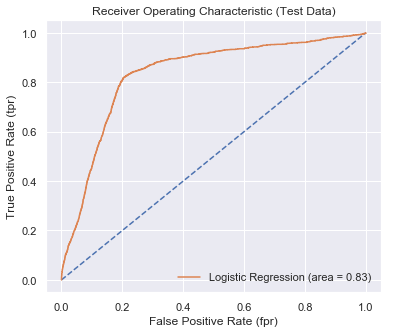

In [470]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(final_y_test, lrO_y_probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Test Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Test')
plt.show()

In [482]:
lift_lrO = calc_cumulative_gains(final_y_test, lrO_y_pred, lrO_y_probs, 10)
lift_lrO

,Decile,NumObservation,Positive_withModel,Positive_withoutModel,Ratio,CumPositive_withModel,CumPositive_withoutModel,Gain,Gain_percentage,lift
0,1,5000,735,178.4,0.1,735,178.4,0.411996,41.199552,4.119955
1,2,5000,611,178.4,0.2,1346,356.8,0.754484,75.448430,3.772422
2,3,5000,191,178.4,0.3,1537,535.2,0.861547,86.154709,2.871824
3,4,5000,63,178.4,0.4,1600,713.6,0.896861,89.686099,2.242152
4,5,5000,41,178.4,0.5,1641,892.0,0.919843,91.984305,1.839686
5,6,5000,28,178.4,0.6,1669,1070.4,0.935538,93.553812,1.559230
6,7,5000,30,178.4,0.7,1699,1248.8,0.952354,95.235426,1.360506
7,8,5000,16,178.4,0.8,1715,1427.2,0.961323,96.132287,1.201654
8,9,5000,36,178.4,0.9,1751,1605.6,0.981502,98.150224,1.090558
9,10,4999,33,178.4,1.0,1784,1784.0,1.000000,100.000000,1.000000


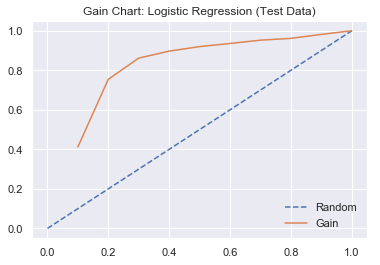

In [483]:
plot_cumulative_gains(lift_lrO,title = "Gain Chart: Logistic Regression (Test Data)")

Lift value of Top Decile:4.120


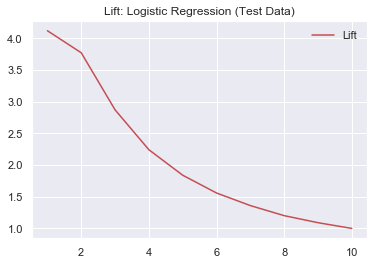

In [507]:
print('Lift value of Top Decile:{:.3f}'.format(lift_lrO['lift'][0]))
plot_lift_chart(lift_lrO, title = 'Lift: Logistic Regression (Test Data)')

**`Lift and Area under Curves (Random Forest)`**

In [485]:
rfO_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                oob_score=False, random_state=42, verbose=0, warm_start=False)

In [486]:
rfO_model.fit(smt_X_train, smt_y_train)
rfO_y_pred = rfO_model.predict(final_X_test)
rfO_y_probs = rfO_model.predict_proba(final_X_test)
rfO_y_probs = rfO_y_probs[:,1]

In [487]:
auc_value = roc_auc_score(final_y_test, rfO_y_probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.740


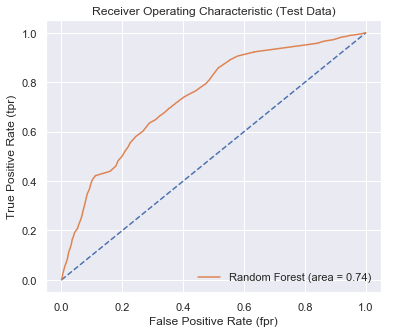

In [488]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(final_y_test, rfO_y_probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Test Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('RF_ROC_Test')
plt.show()

In [489]:
lift_rfO = calc_cumulative_gains(final_y_test, rfO_y_pred, rfO_y_probs, 10)
lift_rfO

,Decile,NumObservation,Positive_withModel,Positive_withoutModel,Ratio,CumPositive_withModel,CumPositive_withoutModel,Gain,Gain_percentage,lift
0,1,5000,652,178.4,0.1,652,178.4,0.365471,36.547085,3.654709
1,2,5000,215,178.4,0.2,867,356.8,0.485987,48.598655,2.429933
2,3,5000,264,178.4,0.3,1131,535.2,0.633969,63.396861,2.113229
3,4,5000,169,178.4,0.4,1300,713.6,0.728700,72.869955,1.821749
4,5,5000,151,178.4,0.5,1451,892.0,0.813341,81.334081,1.626682
5,6,5000,174,178.4,0.6,1625,1070.4,0.910874,91.087444,1.518124
6,7,5000,38,178.4,0.7,1663,1248.8,0.932175,93.217489,1.331678
7,8,5000,29,178.4,0.8,1692,1427.2,0.948430,94.843049,1.185538
8,9,5000,44,178.4,0.9,1736,1605.6,0.973094,97.309417,1.081216
9,10,4999,48,178.4,1.0,1784,1784.0,1.000000,100.000000,1.000000


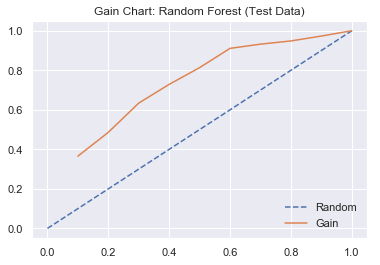

In [490]:
plot_cumulative_gains(lift_rfO,title = "Gain Chart: Random Forest (Test Data)")

Lift value of Top Decile:3.655


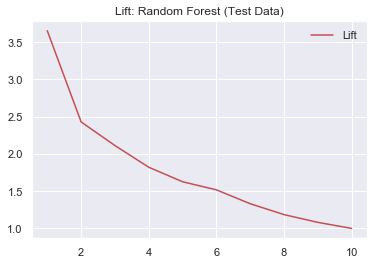

In [508]:
print('Lift value of Top Decile:{:.3f}'.format(lift_rfO['lift'][0]))
plot_lift_chart(lift_rfO, title = 'Lift: Random Forest (Test Data)')

**`Lift and Area under Curves (Gradient Boosting)`**

In [492]:
gbN_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4.0,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=1e-05,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [493]:
gbN_model.fit(imb_X_train, imb_y_train)
gbN_y_pred = gbN_model.predict(final_X_test)
gbN_y_probs = gbN_model.predict_proba(final_X_test)
gbN_y_probs = gbN_y_probs[:,1]

In [494]:
auc_value = roc_auc_score(final_y_test, gbN_y_probs)
print('Area Under the Curve (AUC): %.3f' % auc_value)

Area Under the Curve (AUC): 0.852


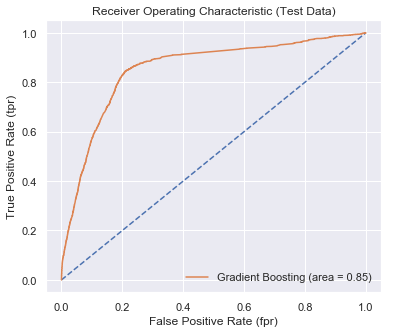

In [495]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(final_y_test, gbN_y_probs)

plt.figure(figsize = (6,5))
plt.plot([0, 1], [0, 1], linestyle='--')       # plot no skill
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % auc_value)
plt.title("Receiver Operating Characteristic (Test Data)")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.legend(loc="lower right")
plt.savefig('GB_ROC_Test')
plt.show()

In [496]:
lift_gbN = calc_cumulative_gains(final_y_test, gbN_y_pred, gbN_y_probs, 10)
lift_gbN

,Decile,NumObservation,Positive_withModel,Positive_withoutModel,Ratio,CumPositive_withModel,CumPositive_withoutModel,Gain,Gain_percentage,lift
0,1,5000,901,178.4,0.1,901,178.4,0.505045,50.504484,5.050448
1,2,5000,489,178.4,0.2,1390,356.8,0.779148,77.914798,3.895740
2,3,5000,187,178.4,0.3,1577,535.2,0.883969,88.396861,2.946562
3,4,5000,48,178.4,0.4,1625,713.6,0.910874,91.087444,2.277186
4,5,5000,26,178.4,0.5,1651,892.0,0.925448,92.544843,1.850897
5,6,5000,17,178.4,0.6,1668,1070.4,0.934978,93.497758,1.558296
6,7,5000,18,178.4,0.7,1686,1248.8,0.945067,94.506726,1.350096
7,8,5000,38,178.4,0.8,1724,1427.2,0.966368,96.636771,1.207960
8,9,5000,36,178.4,0.9,1760,1605.6,0.986547,98.654709,1.096163
9,10,4999,24,178.4,1.0,1784,1784.0,1.000000,100.000000,1.000000


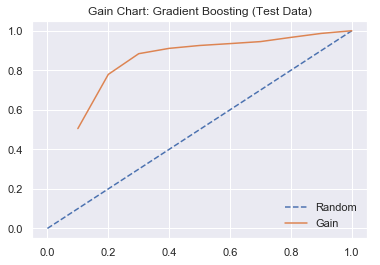

In [497]:
plot_cumulative_gains(lift_gbN,title = "Gain Chart: Gradient Boosting (Test Data)")

Lift value of Top Decile:5.050


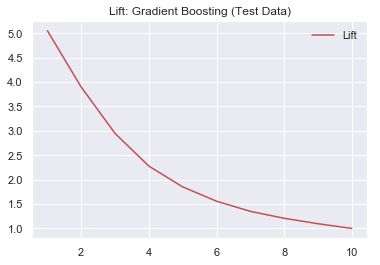

In [509]:
print('Lift value of Top Decile:{:.3f}'.format(lift_gbN['lift'][0]))
plot_lift_chart(lift_gbN, title = 'Lift: Gradient Boosting (Test Data)')

### Top Quartile

`Logistic Regression`

Lift value of Top Quartile:3.352


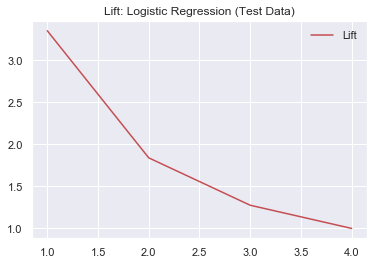

In [510]:
lift_lrO_quar = calc_cumulative_gains(final_y_test, lrO_y_pred, lrO_y_probs, 4)

print('Lift value of Top Quartile:{:.3f}'.format(lift_lrO_quar['lift'][0]))
plot_lift_chart(lift_lrO_quar, title = 'Lift: Logistic Regression (Test Data)')

`Random Forest`

Lift value of Top Quartile:2.294


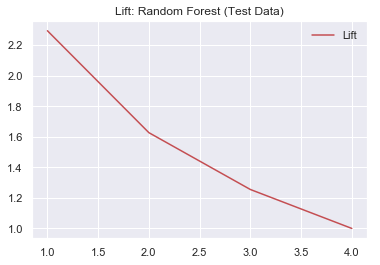

In [511]:
lift_rfO_quar = calc_cumulative_gains(final_y_test, rfO_y_pred, rfO_y_probs, 4)

print('Lift value of Top Quartile:{:.3f}'.format(lift_rfO_quar['lift'][0]))
plot_lift_chart(lift_rfO_quar, title = 'Lift: Random Forest (Test Data)')

`Gradient Boosting`

Lift value of Top Quartile:3.428


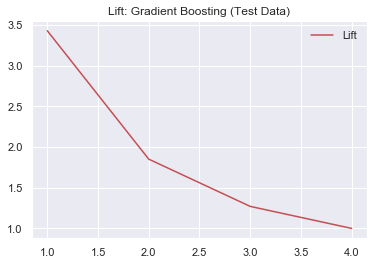

In [512]:
lift_gbN_quar = calc_cumulative_gains(final_y_test, gbN_y_pred, gbN_y_probs, 4)

print('Lift value of Top Quartile:{:.3f}'.format(lift_gbN_quar['lift'][0]))
plot_lift_chart(lift_gbN_quar, title = 'Lift: Gradient Boosting (Test Data)')

### Top 2 Percentile

`Logistic Regression`

Lift value of Top 2 Percentile:5.493


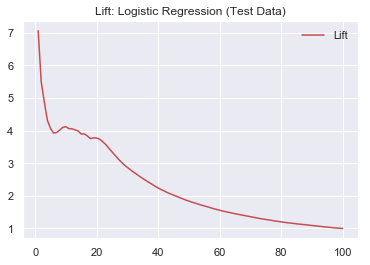

In [517]:
lift_lrO_per = calc_cumulative_gains(final_y_test, lrO_y_pred, lrO_y_probs, 100)

print('Lift value of Top 2 Percentile:{:.3f}'.format(lift_lrO_per['lift'][1]))
plot_lift_chart(lift_lrO_per, title = 'Lift: Logistic Regression (Test Data)')

`Random Forest`

Lift value of Top 2 Percentile:3.924


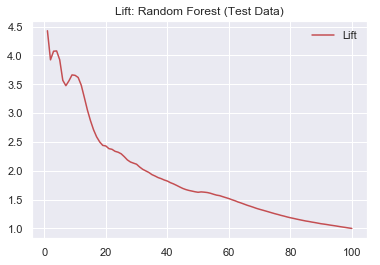

In [520]:
lift_rfO_per = calc_cumulative_gains(final_y_test, rfO_y_pred, rfO_y_probs, 100)

print('Lift value of Top 2 Percentile:{:.3f}'.format(lift_rfO_per['lift'][1]))
plot_lift_chart(lift_rfO_per, title = 'Lift: Random Forest (Test Data)')

`Gradient Boosting`

Lift value of Top 2 Percentile:7.763


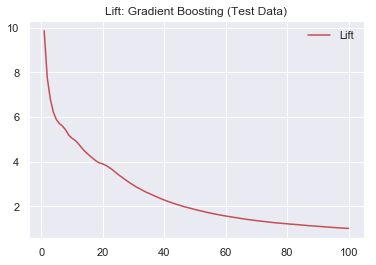

In [522]:
lift_gbN_per = calc_cumulative_gains(final_y_test, gbN_y_pred, gbN_y_probs, 100)

print('Lift value of Top 2 Percentile:{:.3f}'.format(lift_gbN_per['lift'][1]))
plot_lift_chart(lift_gbN_per, title = 'Lift: Gradient Boosting (Test Data)')

## Best value of regularization parameter for penalized logistic regression

`Penalized Logistic Regression - L1 Penalty`

In [180]:
param_tune = [{'C'            :np.logspace(-3,3,20),
               'penalty'      :['l1'],
               'class_weight' :['balanced'],
               'random_state' :[42]
              }]

In [181]:
lr_l1 = GridSearchCV(LogisticRegression(), param_grid=param_tune, cv=3, n_jobs=-1)
lr_l1.fit(imb_X_train, imb_y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([1.00000e-03, 2.06914e-03, 4.28133e-03, 8.85867e-03, 1.83298e-02,
       3.79269e-02, 7.84760e-02, 1.62378e-01, 3.35982e-01, 6.95193e-01,
       1.43845e+00, 2.97635e+00, 6.15848e+00, 1.27427e+01, 2.63665e+01,
       5.45559e+01, 1.12884e+02, 2.33572e+02, 4.83293e+02, 1.00000e+03]), 'penalty': ['l1'], 'class_weight': ['balanced'], 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [183]:
lr_l1.best_params_

{'C': 0.6951927961775606,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'random_state': 42}

`Penalized Logistic Regression - L2 Penalty`

In [ ]:
param_tune = [{'C'            :np.logspace(-3,3,20),
               'penalty'      :['l1'],
               'class_weight' :['balanced'],
               'random_state' :[42]
              }]

In [ ]:
lr_l2 = GridSearchCV(LogisticRegression(), param_grid=param_tune, cv=3, n_jobs=-1)
lr_l2.fit(imb_X_train, imb_y_train)

In [ ]:
lr_l2.best_param_

## Features have non-zero coefficients when the penalization parameter alpha is set to 0

Penalization parameter alpha and regularization parameter C are inversely proportional to each other, so alpha = 0 means c >> 1

In [541]:
lr_l1_C_Lar = LogisticRegression(C=1e7, 
                               class_weight='balanced', 
                               penalty='l1',
                               random_state=42)

lr_l1_C_Lar.fit(imb_X_train, imb_y_train)

#--------------------------------------
temp = (lr_l1_C_Lar.coef_).tolist()

LogisticRegression(C=10000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
flat_list = [item for sublist in temp for item in sublist]
coeff_df = pd.DataFrame(flat_list, index = lst_FinalFeatures, columns=['Coff_LargeC_l1'])

In [542]:
lr_l2_C_Lar = LogisticRegression(C=1e7, 
                               class_weight='balanced', 
                               penalty='l2',
                               random_state=42)

lr_l2_C_Lar.fit(imb_X_train, imb_y_train)

#--------------------------------------
temp = (lr_l2_C_Lar.coef_).tolist()

LogisticRegression(C=10000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [572]:
flat_list = [item for sublist in temp for item in sublist]
coeff_df['Coff_LargeC_l2'] = flat_list

In [573]:
coeff_df

,Coff_LargeC_l1,Coff_LargeC_l2
total_prodV_bookings_amount,-0.091679,-0.091694
prodV_booking_pct,1.033632,1.033587
prodG_booking_pct,-0.274667,-0.274739
prodG_2015_bookings_amount,0.168793,0.168785
prodA_qty,0.266601,0.266620
prodA_2015_bookings_amount,-0.060020,-0.060014
num_orders,0.212569,0.212592
num_order_lines,-0.028352,-0.028345
idm_no_of_day_visits_to_license_page,0.177544,0.177547
hyperthreading_active_flag,-0.361261,-0.361292


**All the features have non-zero coefficients if penalization parameter alpha = 0 (C >> 1) in both `Penalized Logistic Regression`**

## When alpha is set to 1

Penalization parameter alpha and regularization parameter C are inversely proportional to each other, so alpha = 1 means c << 0

In [574]:
lr_l1_C_Small = LogisticRegression(C=0.001, 
                               class_weight='balanced', 
                               penalty='l1',
                               random_state=42)

lr_l1_C_Small.fit(imb_X_train, imb_y_train)

#--------------------------------------
temp = (lr_l1_C_Small.coef_).tolist()

In [575]:
flat_list = [item for sublist in temp for item in sublist]
coeff_df['Coff_SmallC_l1'] = flat_list

In [576]:
lr_l2_C_Small = LogisticRegression(C=0.001, 
                                   class_weight='balanced', 
                                   penalty='l2',
                                   random_state=42)

lr_l2_C_Small.fit(imb_X_train, imb_y_train)

#--------------------------------------
temp = (lr_l2_C_Small.coef_).tolist()

In [577]:
flat_list = [item for sublist in temp for item in sublist]
coeff_df['Coff_SmallC_l2'] = flat_list

In [578]:
coeff_df

,Coff_LargeC_l1,Coff_LargeC_l2,Coff_SmallC_l1,Coff_SmallC_l2
total_prodV_bookings_amount,-0.091679,-0.091694,0.000000,-0.014455
prodV_booking_pct,1.033632,1.033587,1.097535,1.073275
prodG_booking_pct,-0.274667,-0.274739,0.000000,-0.048209
prodG_2015_bookings_amount,0.168793,0.168785,0.164730,0.218455
prodA_qty,0.266601,0.266620,0.000000,0.129184
prodA_2015_bookings_amount,-0.060020,-0.060014,0.000000,-0.084390
num_orders,0.212569,0.212592,0.174283,0.237792
num_order_lines,-0.028352,-0.028345,0.000000,-0.045590
idm_no_of_day_visits_to_license_page,0.177544,0.177547,0.102731,0.146567
hyperthreading_active_flag,-0.361261,-0.361292,0.000000,-0.195936


In [586]:
print('{:.2f} coefficient become ZERO on penalizing (l1) with small C'.format(coeff_df.Coff_SmallC_l1.value_counts()[0]/len(lst_FinalFeatures)*100))

82.22 coefficient become ZERO on penalizing (l1) with small C


## Comparing the values at each decile for a normal and regularized logistic regression

`Logistic Regression with no regularization`

In [184]:
lr_normal= LogisticRegression(C=1, 
                               class_weight='balanced', 
                               penalty='l1',
                               random_state=42)

lr_normal.fit(imb_X_train, imb_y_train)
probs_norm = lr_normal.predict_proba(final_X_test)
probs_norm = probs_norm[:,1]
#--------------------------------------
temp = (lr_normal.coef_).tolist()

In [185]:
flat_list = [item for sublist in temp for item in sublist]
coeffCompare_df = pd.DataFrame(flat_list, index = lst_FinalFeatures, columns=['Coff_NormalLR_l1'])

ValueError: Length of values does not match length of index

`Logistic Regression with regularization`

In [ ]:
lr_regularize = LogisticRegression(C=0.6951927961775606, 
                                   class_weight='balanced', 
                                   penalty='l1',
                                   random_state=42)

lr_regularize.fit(imb_X_train, imb_y_train)
#--------------------------------------
temp = (lr_regularize.coef_).tolist()

In [591]:
flat_list = [item for sublist in temp for item in sublist]
coeffCompare_df['Coff_RegularizedLR_l1'] = flat_list

coeffCompare_df

,Coff_NormalLR_l1
total_prodV_bookings_amount,-0.090726
prodV_booking_pct,1.035986
prodG_booking_pct,-0.270440
prodG_2015_bookings_amount,0.169098
prodA_qty,0.265107
prodA_2015_bookings_amount,-0.059935
num_orders,0.212240
num_order_lines,-0.027509
idm_no_of_day_visits_to_license_page,0.177177
hyperthreading_active_flag,-0.356477


#### Lift plot for the comparison

In [ ]:
lift_norm    = calc_cumulative_gains(final_y_test, norm_y_pred, probs_norm, 10)
lift_regular = calc_cumulative_gains(final_y_test, regular_y_pred, probs_regular, 10)

In [ ]:
plot_lift_chart(lift_norm, title = 'Lift: Logistic Regression with nominal regularization')

In [ ]:
plot_lift_chart(lift_regular, title = 'Lift: Logistic Regression with regularization')